# Jewlery Stores Analysis

### Information about the Project

# Libraries

In [63]:
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize
from scipy.stats import ttest_ind
# from sklearn.cluster import KMeans
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# import nltk
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import string

# Data Cleaning and Preparation

In [64]:
sales = pd.read_csv("Sales.csv")
sales.head(5)

Store_ID  Sales_ID  DOC_TYPE        DATE  SELLER  PRODUCT_ID  GENDER  QTD  \
0         1   1024481  INVOICE   2018-01-15       1       99863    MALE    1   
1         1   1024491  INVOICE   2018-01-15       2      341100  UNKNOW    1   
2         1   1024486  INVOICE   2018-01-15       1      305995  UNKNOW    1   
3         1   1024495  INVOICE   2018-01-16       3      701976  UNKNOW    1   
4         1   1024492  INVOICE   2018-01-16       2      334863  UNKNOW    1   

       PRODUCT     MATERIAL  TOTAL_SALES  UNITARY_PRICE  DISCOUNT  TAX  VAT  \
0  REPAIR ITEM  NOT DEFINED        30.00          30.00      0.00 0.23 5.61   
1     NECKLACE   SILVER 925        34.30          34.32      0.02 0.23 6.41   
2         RING   SILVER 925        16.55          16.55      0.00 0.23 3.09   
3    BRACELET         STEEL        27.50          29.00      1.50 0.23 5.14   
4        CHARM   SILVER 925        22.00          23.20      1.20 0.23 4.11   

   COST  PROFIT  TEMPERATURE  PRECIPITATION  CLOUDCOVER(%)  
0 15.00    9.39        10.60           0.00           4.50  
1 15.50   12.39        10.60           0.00           4.50  
2  9.43    4.03        10.60           0.00           4.50  
3 13.50    8.86        13.95           0.01          87.92  
4 11.60    6.29        13.95           0.01          87.92

In [65]:
sales.isnull().sum()

Store_ID         0
Sales_ID         0
DOC_TYPE         0
DATE             0
SELLER           0
PRODUCT_ID       0
GENDER           0
QTD              0
PRODUCT          0
MATERIAL         0
TOTAL_SALES      0
UNITARY_PRICE    0
DISCOUNT         0
TAX              0
VAT              0
COST             0
PROFIT           0
TEMPERATURE      0
PRECIPITATION    0
CLOUDCOVER(%)    0
dtype: int64

In [66]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43335 entries, 0 to 43334
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store_ID       43335 non-null  int64  
 1   Sales_ID       43335 non-null  int64  
 2   DOC_TYPE       43335 non-null  object 
 3   DATE           43335 non-null  object 
 4   SELLER         43335 non-null  int64  
 5   PRODUCT_ID     43335 non-null  int64  
 6   GENDER         43335 non-null  object 
 7   QTD            43335 non-null  int64  
 8   PRODUCT        43335 non-null  object 
 9   MATERIAL       43335 non-null  object 
 10  TOTAL_SALES    43335 non-null  float64
 11  UNITARY_PRICE  43335 non-null  float64
 12  DISCOUNT       43335 non-null  float64
 13  TAX            43335 non-null  float64
 14  VAT            43335 non-null  float64
 15  COST           43335 non-null  float64
 16  PROFIT         43335 non-null  float64
 17  TEMPERATURE    43335 non-null  float64
 18  PRECIP

In [67]:
#Convert Column DATE to datetime
sales['DATE'] = pd.to_datetime(sales['DATE'])

#Create columns Year, Month, day
sales['YEAR'] = sales['DATE'].dt.year
sales['MONTH'] = sales['DATE'].dt.month
sales['DAY'] = sales['DATE'].dt.day

# Exploratory Data Analysis (EDA)

In [68]:
desc_stats = sales.describe()
desc_stats

Store_ID   Sales_ID   SELLER  PRODUCT_ID      QTD  TOTAL_SALES  \
count  43335.00   43335.00 43335.00    43335.00 43335.00     43335.00   
mean       1.24 4438100.69     2.60  1240048.27     1.10        37.18   
std        0.43 2971428.10     1.58  1809396.21     1.03       100.90   
min        1.00 1024466.00     1.00        1.00    -3.00      -670.00   
25%        1.00 1032909.00     1.00   100084.50     1.00         4.00   
50%        1.00 7022309.00     3.00   325027.00     1.00        15.00   
75%        1.00 7031042.50     3.00  2000253.50     1.00        32.00   
max        2.00 7200573.00     5.00  5007892.00   119.00      3500.00   

       UNITARY_PRICE  DISCOUNT      TAX      VAT     COST   PROFIT  \
count       43335.00  43335.00 43335.00 43335.00 43335.00 43335.00   
mean           39.90      1.98     0.23     6.87    17.26    13.05   
std           104.89      9.35     0.00    17.87    53.14    37.98   
min             0.00      0.00     0.00  -125.28  -420.00  -291.25   
25%             3.50      0.00     0.23     0.75     1.20     2.08   
50%            15.00      0.00     0.23     2.80     6.50     5.49   
75%            33.50      1.04     0.23     5.98    15.00    10.96   
max          3800.00    398.13     0.23   654.47  2536.90  1797.69   

       TEMPERATURE  PRECIPITATION  CLOUDCOVER(%)     YEAR    MONTH      DAY  
count     43335.00       43335.00       43335.00 43335.00 43335.00 43335.00  
mean         18.68           0.06          33.43  2020.34     7.02    16.18  
std           4.37           0.21          29.06     1.66     3.44     8.73  
min           7.63           0.00           0.00  2018.00     1.00     1.00  
25%          15.02           0.00           6.83  2019.00     4.00     9.00  
50%          18.28           0.00          26.92  2020.00     7.00    16.00  
75%          22.11           0.00          53.25  2022.00    10.00    23.00  
max          35.75           4.37         100.00  2023.00    12.00    31.00

## Sales

### Total sales by year for Store 1 and Store 2

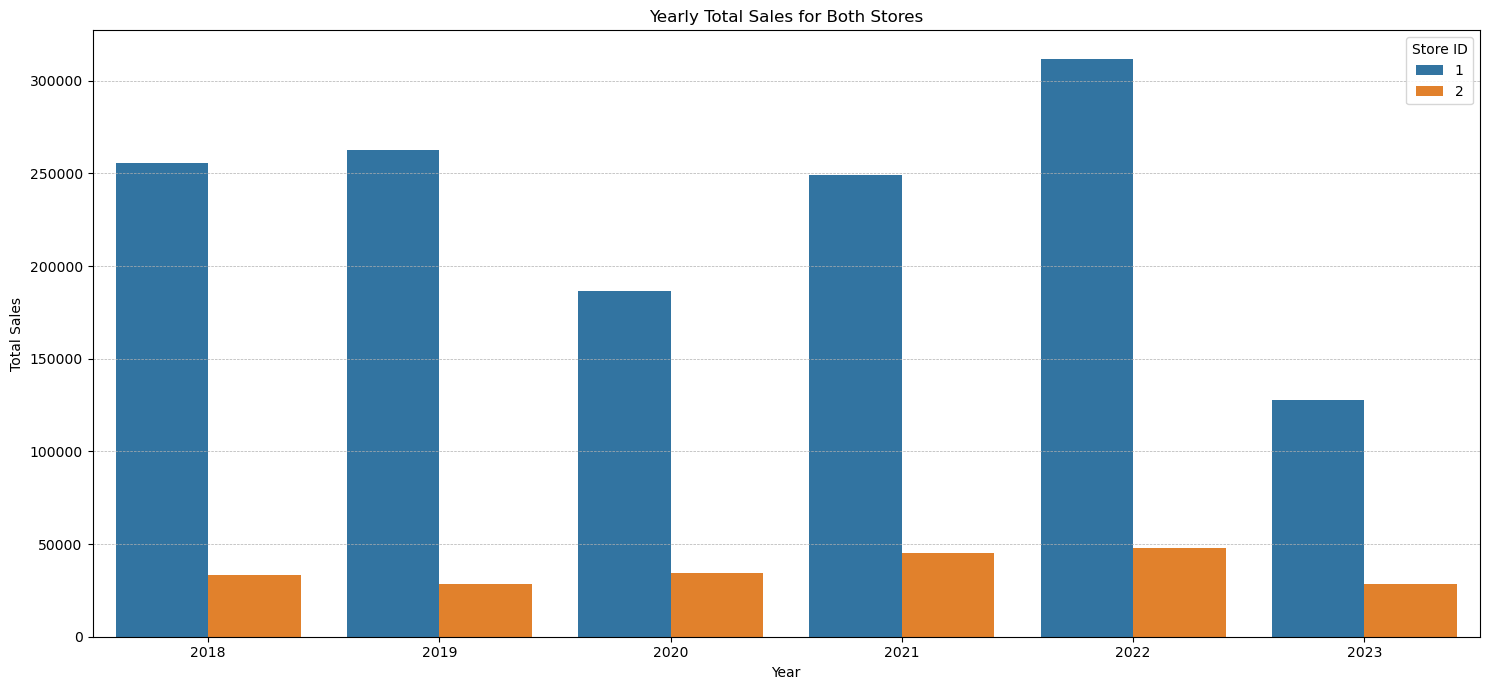

In [69]:
# Group by YEAR and Store_ID to get yearly total sales for each store
yearly_sales_from_sales = sales.groupby(['YEAR', 'Store_ID'])['TOTAL_SALES'].sum().reset_index()

# Plot the yearly total sales for both stores
plt.figure(figsize=(15, 7))
sns.barplot(data=yearly_sales_from_sales, x='YEAR', y='TOTAL_SALES', hue='Store_ID', palette="tab10")
plt.title('Yearly Total Sales for Both Stores')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Store ID')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

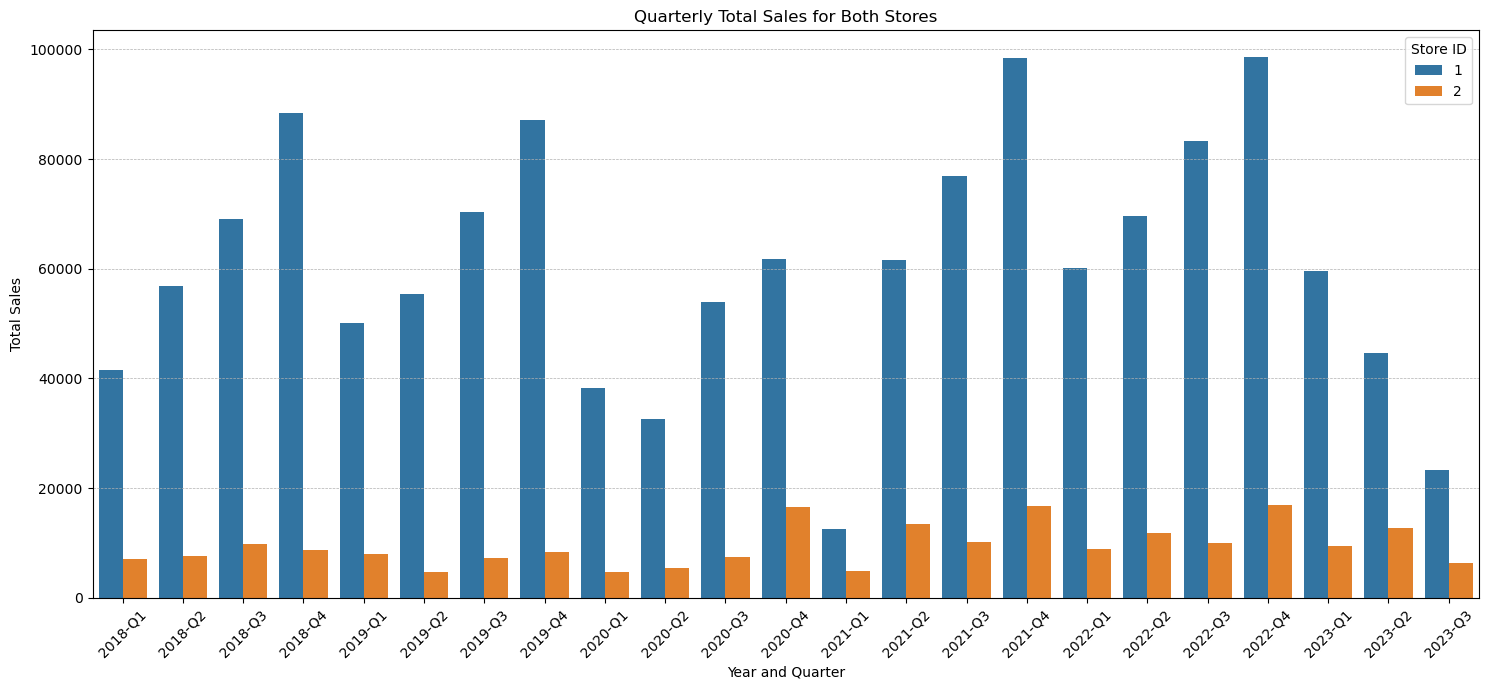

In [70]:
#Display Total Sales by Trimester
sales['YEAR'] = sales['DATE'].dt.year
sales['QUARTER'] = sales['DATE'].dt.quarter

# Group by YEAR, QUARTER, and Store_ID 
quarterly_sales = sales.groupby(['YEAR', 'QUARTER', 'Store_ID'])['TOTAL_SALES'].sum().reset_index()

# Combine YEAR and QUARTER 
quarterly_sales['YEAR_QUARTER'] = quarterly_sales['YEAR'].astype(str) + '-Q' + quarterly_sales['QUARTER'].astype(str)

# Plot the quarterly total sales for both stores
plt.figure(figsize=(15, 7))
sns.barplot(data=quarterly_sales, x='YEAR_QUARTER', y='TOTAL_SALES', hue='Store_ID', palette="tab10")
plt.title('Quarterly Total Sales for Both Stores')
plt.xlabel('Year and Quarter')
plt.ylabel('Total Sales')
plt.legend(title='Store ID')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


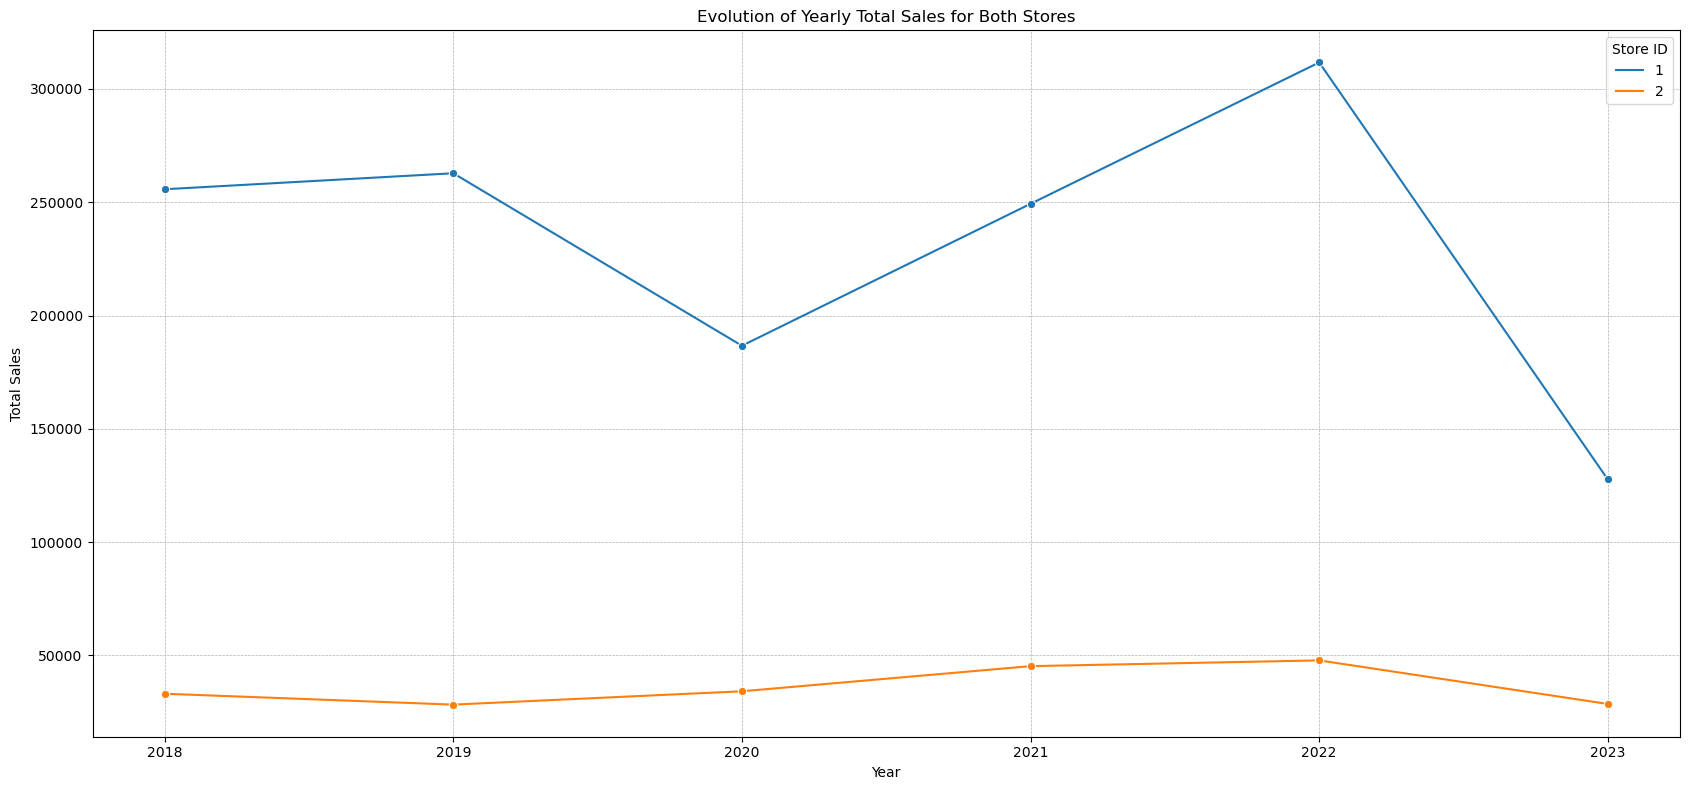

In [71]:
# Yearly total sales evolution for both stores 
plt.figure(figsize=(17, 8))
sns.lineplot(data=yearly_sales_from_sales, x='YEAR', y='TOTAL_SALES', hue='Store_ID', marker='o', palette="tab10")
plt.title('Evolution of Yearly Total Sales for Both Stores')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Store ID')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


### Top 10 Product Sales

In [72]:
sales['PRODUCT'].value_counts()

BATTERY             8130
REPAIR ITEM         5964
EARRING             4594
NECKLACE            3924
BRACELET            3392
CHARM               2827
BRACELET WATCH      2396
RING                1849
WATCHES             1460
EAR PIERCING        1429
HOOPS               1247
COMMITMENT RINGS    1047
WEDDING RING         672
MEDAL                666
WATCH ITEM           454
DECORATION           410
FRAME                326
RELIGIOUS ITEM       311
NOSE PIRCING         287
SMART WATCHES        281
KIDS DECORATION      275
ENGRAVING            175
PEN                  118
ALARM CLOCK          117
RELIGIOUS CHARM      117
KIDS EARRINGS        112
EARRING ITEM          85
SHIPPING              71
ACESSORIES            67
BAG                   65
NECKLACE ITEM         65
KIDS BRACELET         53
DIAMOND               35
KIDS ACESSORIES       34
LAPEL PIN             32
PEN ACESSORIES        28
KIDS WATCHES          24
CUFFLINKS             23
SERVICES              20
KIDS RING             18


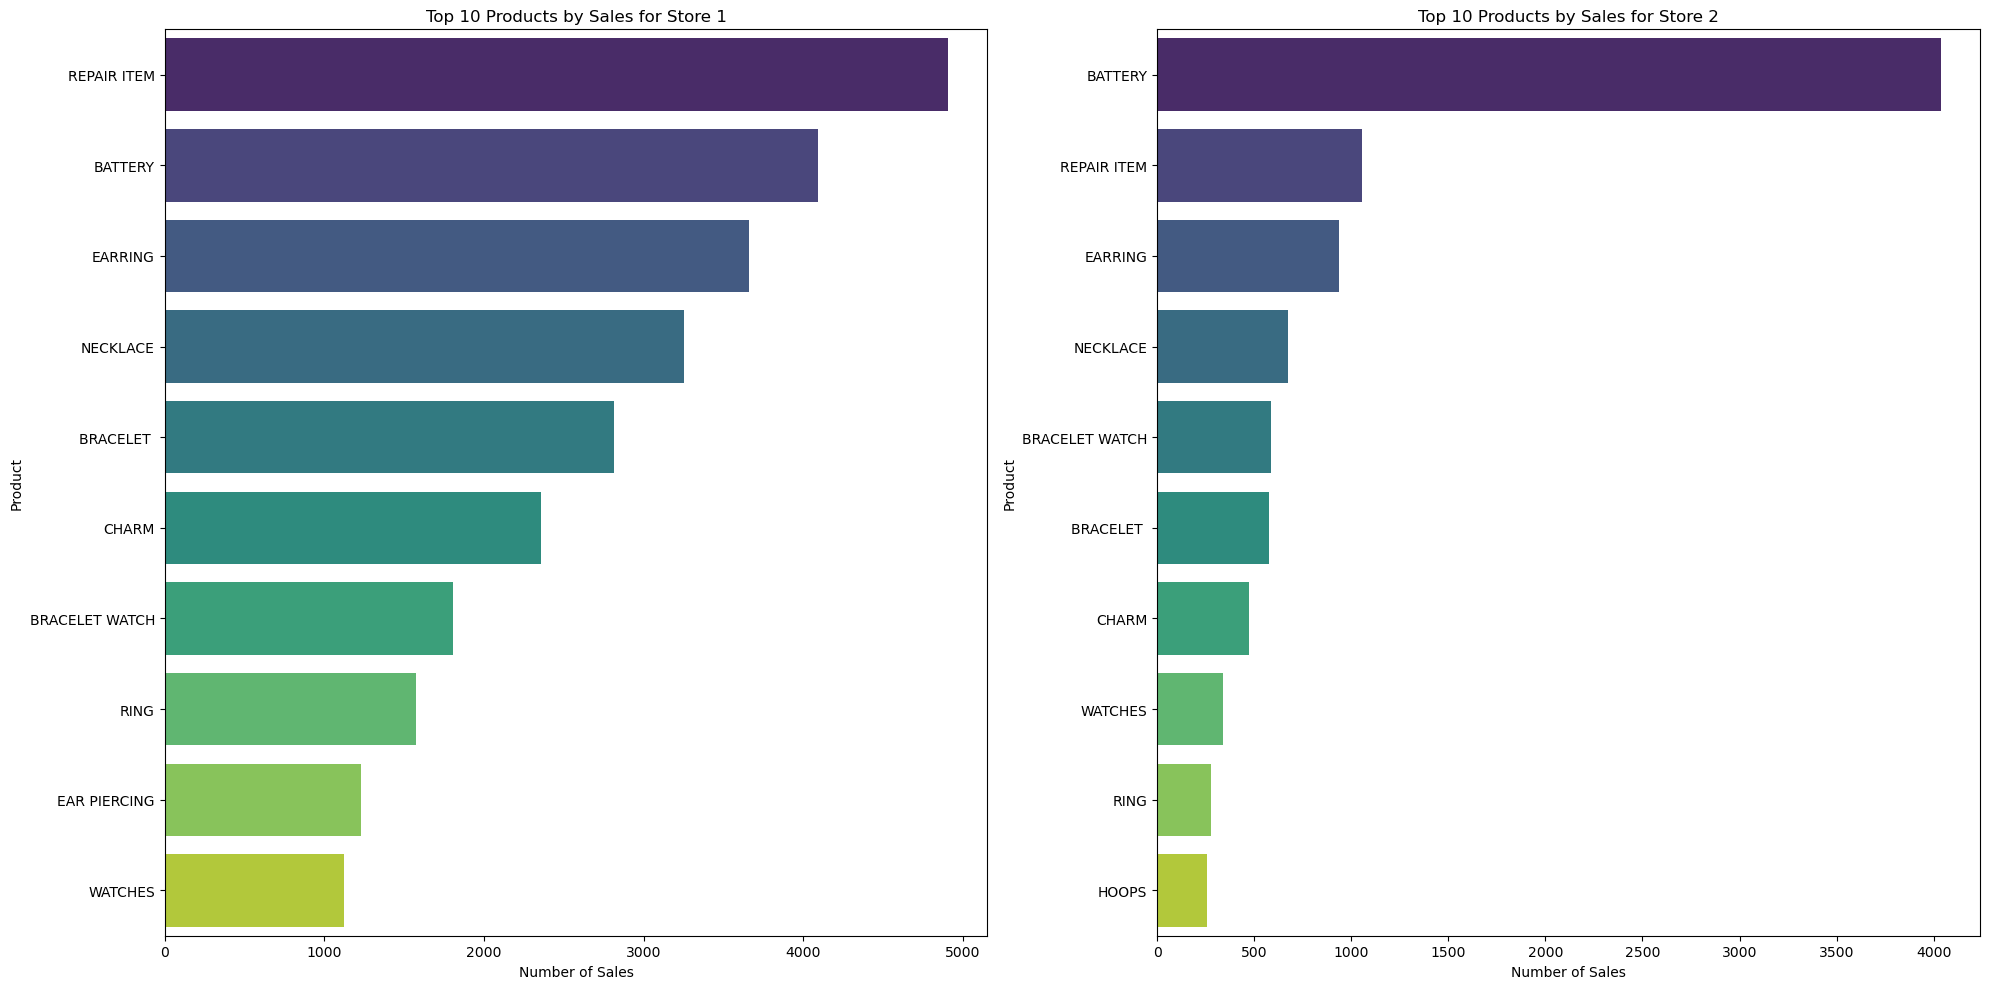

In [73]:
#Plot Top 10 Products
plt.figure(figsize=(20, 10))

# Loop through the unique store IDs to create subplots for each store
for i, store in enumerate(sales['Store_ID'].unique(), 1):
    
    # Filter the data for the current store
    store_sales = sales[sales['Store_ID'] == store]
    
    # Top 10 products by sales for the current store
    product_sales_store = store_sales['PRODUCT'].value_counts().nlargest(10)
    
    # Create the subplot
    plt.subplot(1, 2, i)
    sns.barplot(y=product_sales_store.index, x=product_sales_store.values, palette="viridis")
    plt.title(f'Top 10 Products by Sales for Store {store}')
    plt.xlabel('Number of Sales')
    plt.ylabel('Product')

plt.tight_layout()
plt.show()


### Least 10 Product Sales

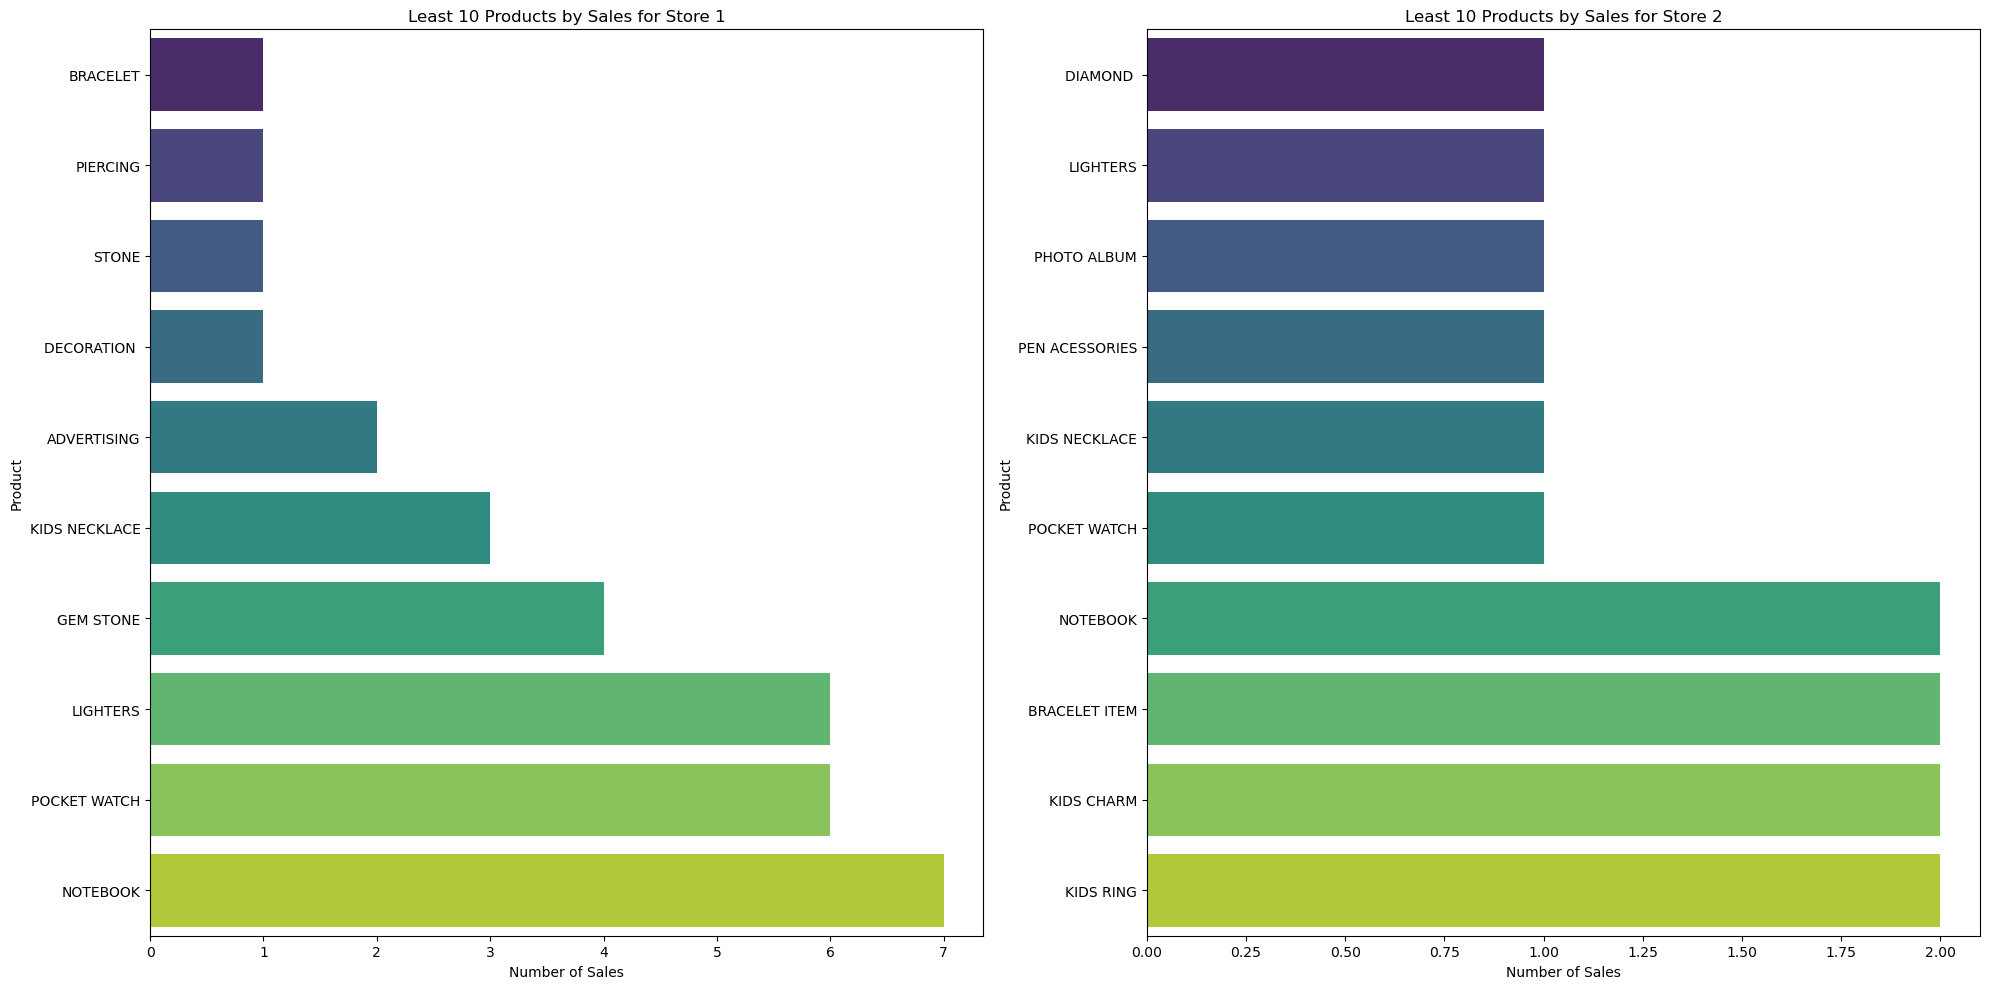

In [74]:
plt.figure(figsize=(20, 10))

# Loop through the unique store IDs to create subplots for each store
for i, store in enumerate(sales['Store_ID'].unique(), 1):
    
    # Filter the data for the current store
    store_sales = sales[sales['Store_ID'] == store]
    
    # Least 10 products by sales for the current store
    product_sales_store = store_sales['PRODUCT'].value_counts().nsmallest(10)
    
    # Create the subplot
    plt.subplot(1, 2, i)
    sns.barplot(y=product_sales_store.index, x=product_sales_store.values, palette="viridis")
    plt.title(f'Least 10 Products by Sales for Store {store}')
    plt.xlabel('Number of Sales')
    plt.ylabel('Product')

plt.tight_layout()
plt.show()


### Heatmap 10 products by Quantity sold Years

Heatmap for Store 1:


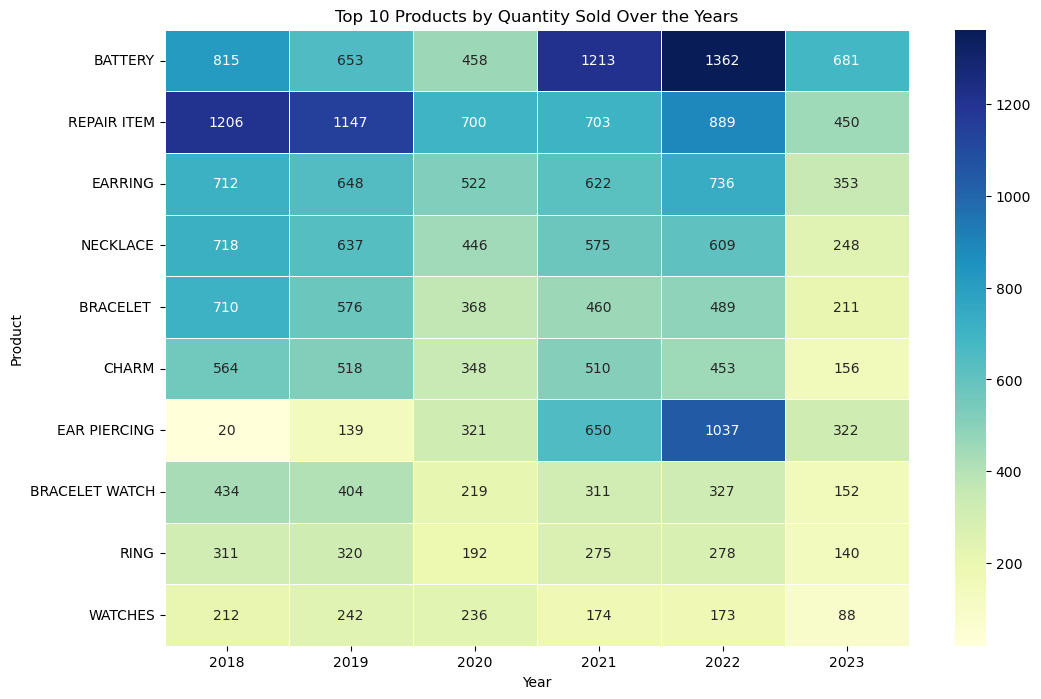

Heatmap for Store 2:


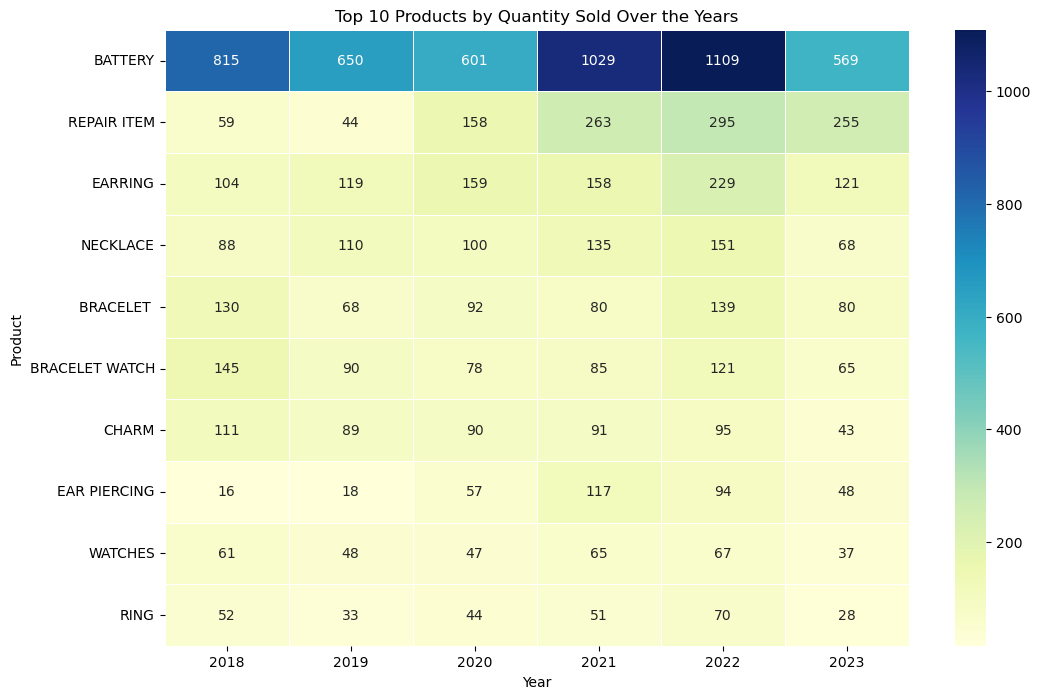

In [75]:
#  top 10 products
def generate_top_10_product_heatmap(store_data):
    # Grouping by year and product to get total quantity sold
    product_analysis_by_year_store = store_data.groupby(['YEAR', 'PRODUCT']).agg({'QTD': 'sum'}).reset_index()

    # Pivot the data to get a matrix format suitable for a heatmap
    heatmap_data = product_analysis_by_year_store.pivot(index='PRODUCT', columns='YEAR', values='QTD').fillna(0)

    # Consider only top 10 products based on total sales over the years for clarity in the heatmap
    top_products = heatmap_data.sum(axis=1).nlargest(10).index
    heatmap_data_filtered = heatmap_data.loc[top_products]

    # Create the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data_filtered, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
    plt.title('Top 10 Products by Quantity Sold Over the Years')
    plt.ylabel('Product')
    plt.xlabel('Year')
    plt.show()

# Generating heatmaps for each store's top 10 products
for store in sales['Store_ID'].unique():
    store_data = sales[sales['Store_ID'] == store]
    print(f"Heatmap for Store {store}:")
    generate_top_10_product_heatmap(store_data)


### Heatmap for Top 10 Materials sold over Years

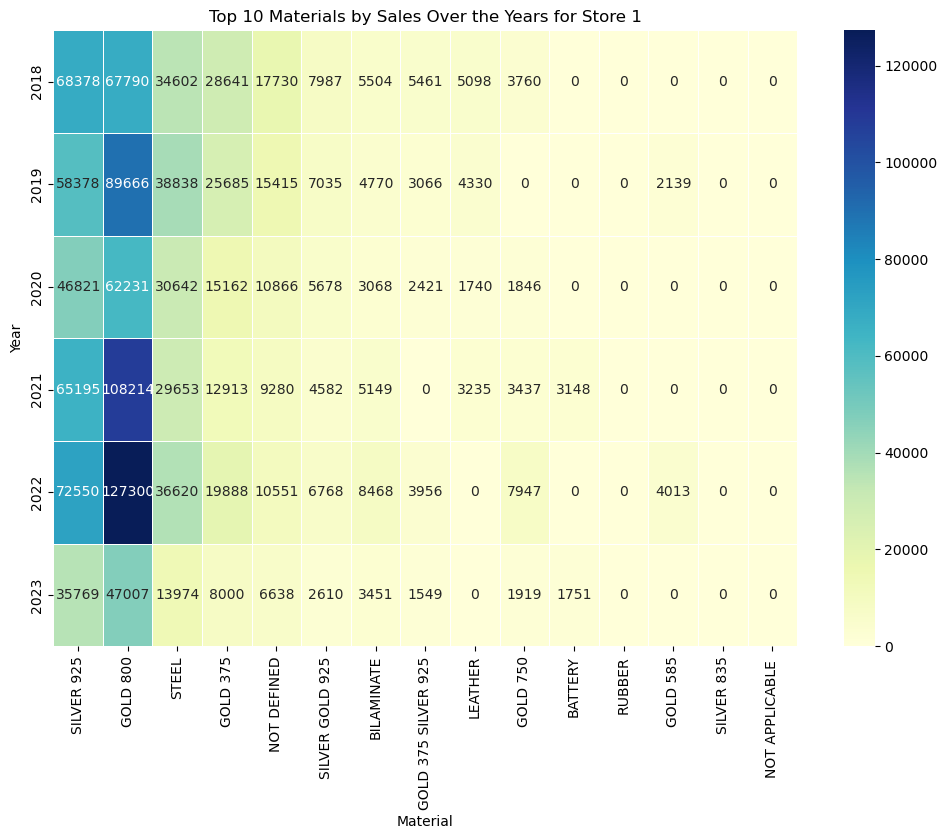

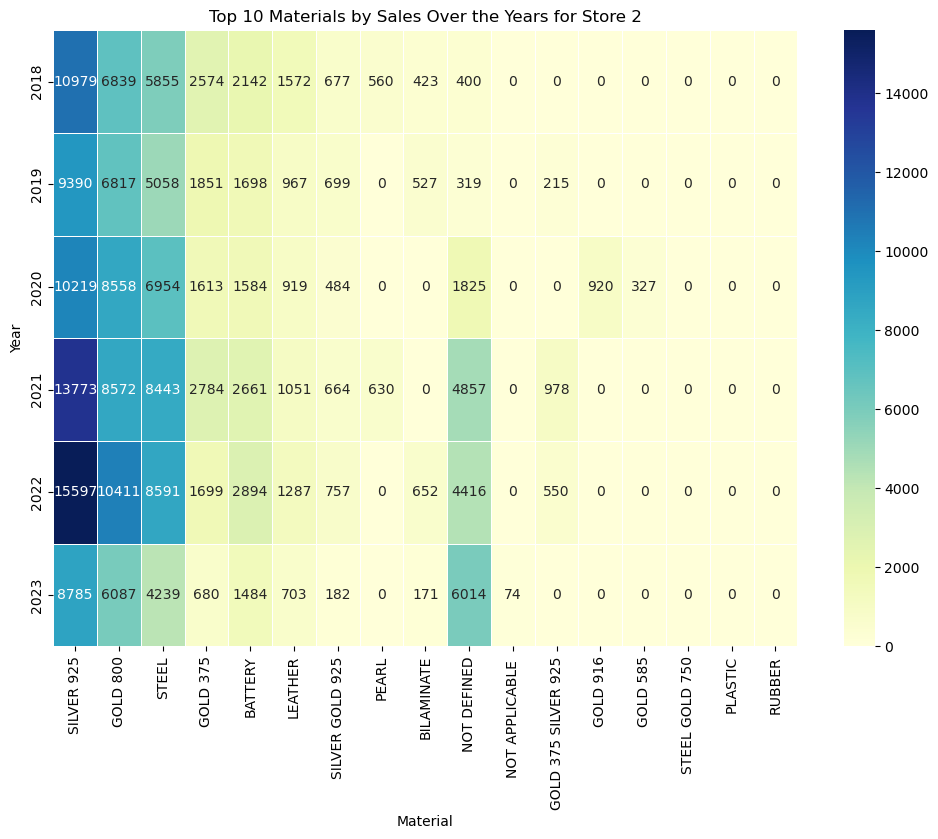

In [76]:
# Dictionary to store the results for each store
storewise_material_analysis = {}

# Iterate over each store and conduct the analysis
for store in sales['Store_ID'].unique():
    
    # Filter data for the store
    store_data = sales[sales['Store_ID'] == store]
    
    # Grouping by year and material to get total sales, total profit, and quantity sold per year
    material_analysis_by_year_store = store_data.groupby(['YEAR', 'MATERIAL']).agg({
        'TOTAL_SALES': 'sum',
        'PROFIT': 'sum',
        'QTD': 'sum'
    }).reset_index()

    # Dictionary to store the top 10 materials for each year
    top_10_materials_by_year_store = {}

    # Iterating through each unique year and getting the top 10 materials based on sales, profit, and quantity
    for year in material_analysis_by_year_store['YEAR'].unique():
        yearly_data = material_analysis_by_year_store[material_analysis_by_year_store['YEAR'] == year]

        # Sorting based on sales, profit, and quantity
        sorted_by_sales = yearly_data.sort_values(by='TOTAL_SALES', ascending=False).head(10).set_index('MATERIAL')['TOTAL_SALES']
        sorted_by_profit = yearly_data.sort_values(by='PROFIT', ascending=False).head(10).set_index('MATERIAL')['PROFIT']
        sorted_by_quantity = yearly_data.sort_values(by='QTD', ascending=False).head(10).set_index('MATERIAL')['QTD']

        # Combining the sorted data
        combined_data = pd.concat([sorted_by_sales, sorted_by_profit, sorted_by_quantity], axis=1, 
                                  keys=['Top 10 Sales', 'Top 10 Profit', 'Top 10 Quantity'])

        # Storing the combined data in the dictionary
        top_10_materials_by_year_store[year] = combined_data

    # Combining the top 10 materials for each year into a single dataframe for the store
    combined_top_10_materials_store = pd.concat(top_10_materials_by_year_store, axis=1).fillna(0)

    # Reordering the columns to group by year and then by the analysis type (Sales, Profit, Quantity)
    ordered_columns = []
    for year in sorted(material_analysis_by_year_store['YEAR'].unique()):
        for metric in ['Top 10 Sales', 'Top 10 Profit', 'Top 10 Quantity']:
            ordered_columns.append((year, metric))

    combined_top_10_materials_store = combined_top_10_materials_store[ordered_columns]
    
    # Store the result in the main dictionary
    storewise_material_analysis[store] = combined_top_10_materials_store

# Creating heatmaps for sales of top 10 materials over the years for each store
for store, data in storewise_material_analysis.items():
    sales_heatmap_sales = data.xs('Top 10 Sales', axis=1, level=1).T

    plt.figure(figsize=(12, 8))
    sns.heatmap(sales_heatmap_sales, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
    plt.title(f'Top 10 Materials by Sales Over the Years for Store {store}')
    plt.ylabel('Year')
    plt.xlabel('Material')
    plt.show()


### Top 10 materials by sales for each store

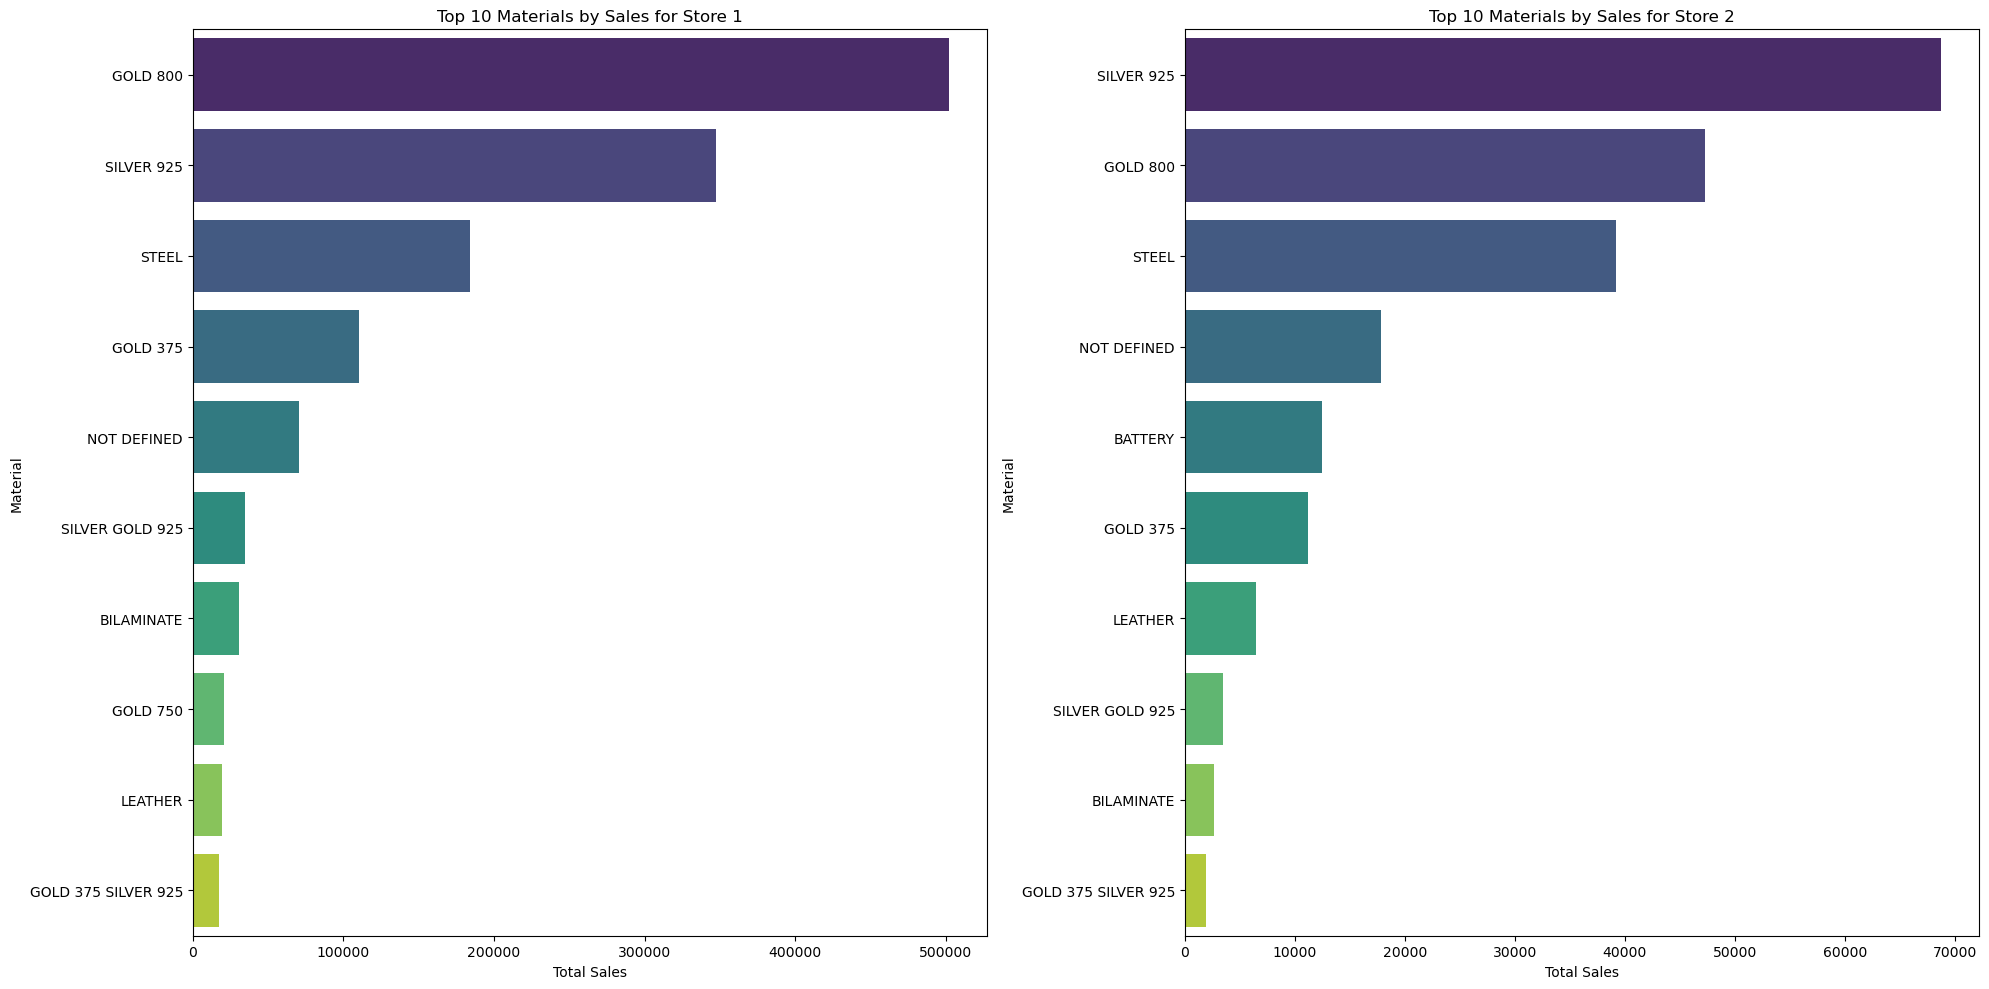

In [77]:
# Plot top 10 materials by sales for each store
plt.figure(figsize=(20, 10))

# Loop through the unique store IDs to create subplots for each store
for i, store in enumerate(sales['Store_ID'].unique(), 1):
    
    # Filter the data for the current store
    store_data = sales[sales['Store_ID'] == store]
    
    # Get the top 10 materials by sales for the current store
    top_materials_store = store_data.groupby('MATERIAL')['TOTAL_SALES'].sum().nlargest(10).reset_index()
    
    # Create the subplot
    plt.subplot(1, 2, i)
    sns.barplot(data=top_materials_store, y='MATERIAL', x='TOTAL_SALES', palette="viridis")
    plt.title(f'Top 10 Materials by Sales for Store {store}')
    plt.xlabel('Total Sales')
    plt.ylabel('Material')

plt.tight_layout()
plt.show()


### Top 10 Least Materials by sales for each store

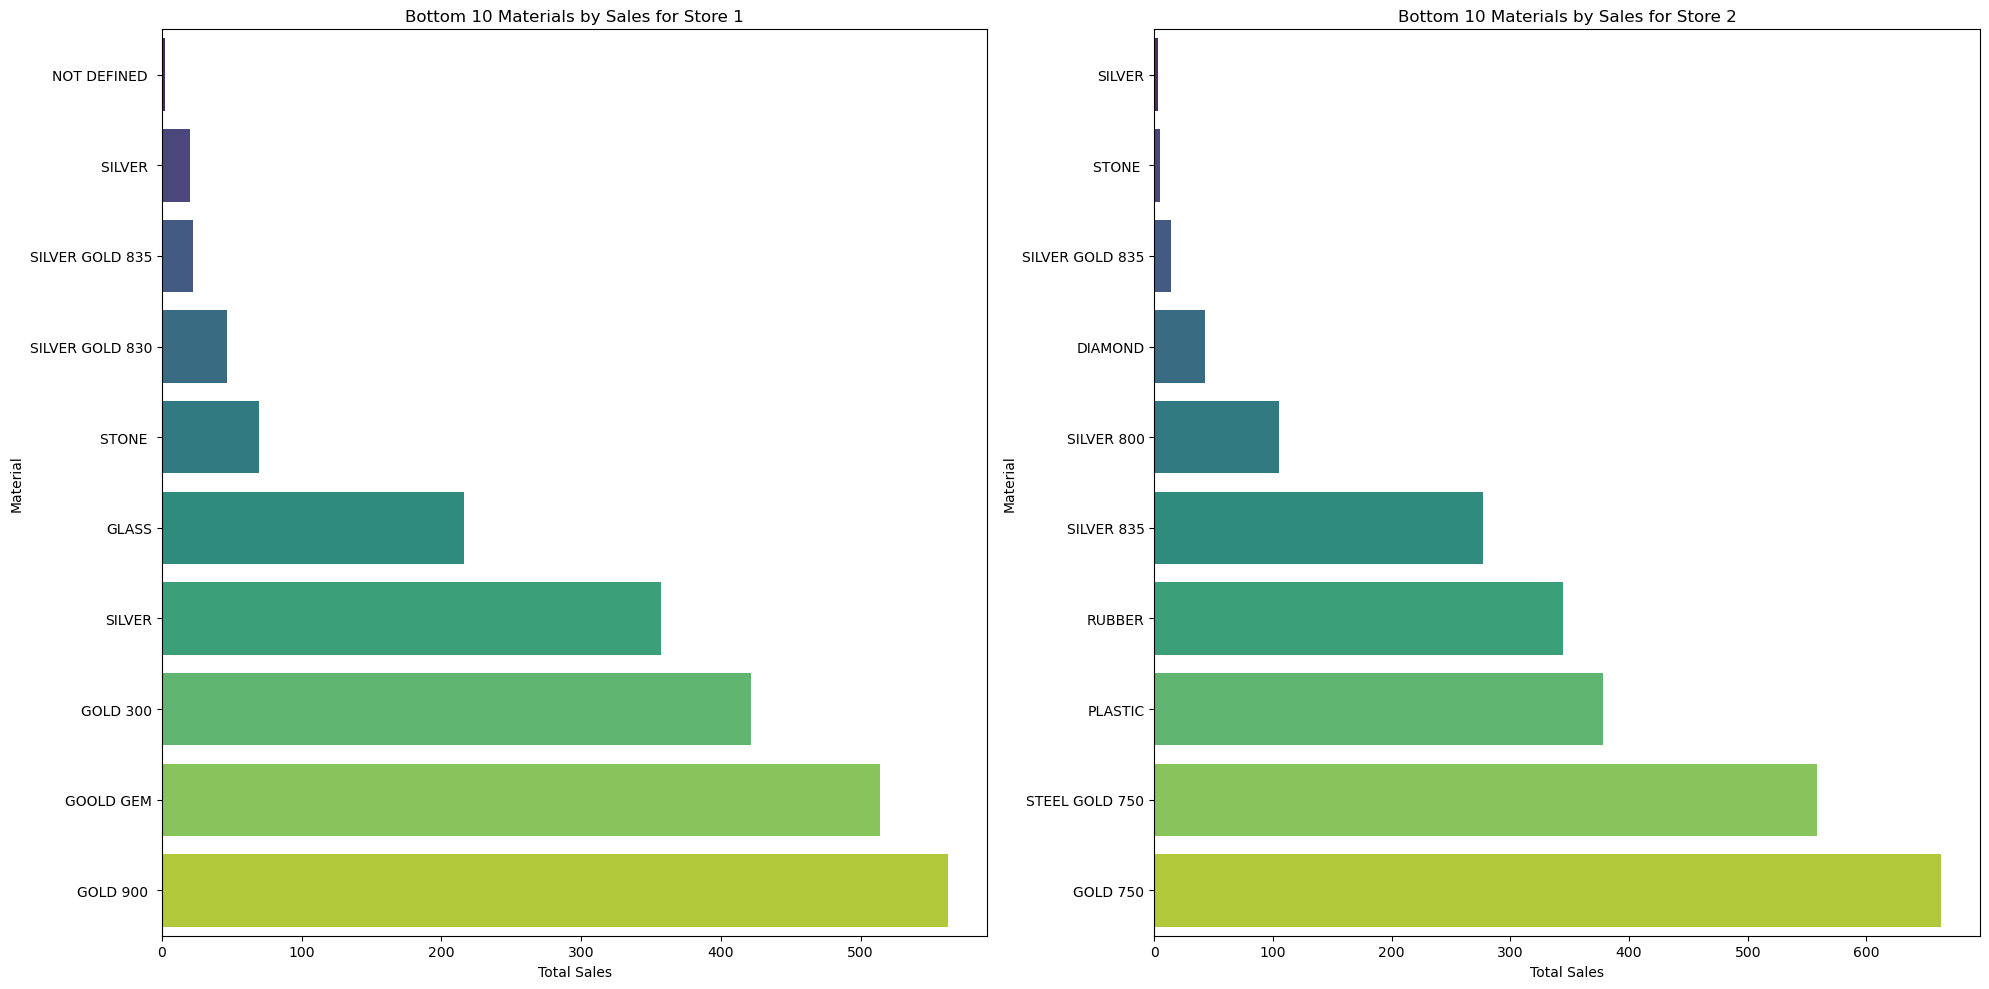

In [78]:
plt.figure(figsize=(20, 10))

# Loop through the unique store IDs to create subplots for each store
for i, store in enumerate(sales['Store_ID'].unique(), 1):
    
    # Filter the data for the current store
    store_data = sales[sales['Store_ID'] == store]
    
    # Least 10 materials by sales for the current store
    least_materials_store = store_data.groupby('MATERIAL')['TOTAL_SALES'].sum().nsmallest(10).reset_index()
    
    # Create the subplot
    plt.subplot(1, 2, i)
    sns.barplot(data=least_materials_store, y='MATERIAL', x='TOTAL_SALES', palette="viridis")
    plt.title(f'Bottom 10 Materials by Sales for Store {store}')
    plt.xlabel('Total Sales')
    plt.ylabel('Material')

plt.tight_layout()
plt.show()


### Total sales and profit based on product materials & Identification of the most popular materials among customers based on the quantity sold

In [79]:
# Grouping by material to get total sales, total profit, and quantity sold
material_analysis = sales.groupby('MATERIAL').agg({
    'TOTAL_SALES': 'sum',
    'PROFIT': 'sum',
    'QTD': 'sum'
}).reset_index()

# Sorting materials based on total sales
material_analysis_sorted_by_sales = material_analysis.sort_values(by='TOTAL_SALES', ascending=False)

# Sorting materials based on profitability
material_analysis_sorted_by_profit = material_analysis.sort_values(by='PROFIT', ascending=False)

# Sorting materials based on quantity (popularity)
material_analysis_sorted_by_quantity = material_analysis.sort_values(by='QTD', ascending=False)

# Combining the three sorted dataframes to show the top 10 for sales, profit, and quantity
top_10_materials = pd.concat([
    material_analysis_sorted_by_sales.head(10).set_index('MATERIAL')['TOTAL_SALES'],
    material_analysis_sorted_by_profit.head(10).set_index('MATERIAL')['PROFIT'],
    material_analysis_sorted_by_quantity.head(10).set_index('MATERIAL')['QTD']
], axis=1, keys=['Top 10 Sales', 'Top 10 Profit', 'Top 10 Quantity'])

top_10_materials.fillna(0).round(2)  # Filling NaN values with 0 for clarity

Top 10 Sales  Top 10 Profit  Top 10 Quantity
MATERIAL                                                     
GOLD 800            549491.00      204075.20          2291.00
SILVER 925          415833.03      138872.05         16168.00
STEEL               223468.58       64884.41          7313.00
GOLD 375            121490.75       40980.14           973.00
NOT DEFINED          88309.78       33671.02          5835.00
SILVER GOLD 925      38123.22       12870.32           930.00
BILAMINATE           33034.89       12173.53          1008.00
BATTERY              26003.54       16585.22          9955.00
LEATHER              25854.12        9996.71          1796.00
GOLD 750             21659.40        7071.32             0.00
NOT APPLICABLE           0.00           0.00           316.00

### The Most and least profitable products for Store 1 and Store 2

In [80]:
top_product1 = sales[sales['Store_ID'] == 1].groupby('PRODUCT').agg({'QTD': 'sum'}).idxmax().values[0]
top_product2 = sales[sales['Store_ID'] == 2].groupby('PRODUCT').agg({'QTD': 'sum'}).idxmax().values[0]
least_product1 = sales[sales['Store_ID'] == 1].groupby('PRODUCT').agg({'QTD': 'sum'}).idxmin().values[0]
least_product2 = sales[sales['Store_ID'] == 2].groupby('PRODUCT').agg({'QTD': 'sum'}).idxmin().values[0]

#Resume of the Most and Least Sold Product
products_summary = pd.DataFrame({
    'Store': ['Store 1', 'Store 2'],
    'Most Sold Product': [top_product1, top_product2],
    'Least Sold Product': [least_product1, least_product2]
})

products_summary

Store Most Sold Product Least Sold Product
0  Store 1           BATTERY           BRACELET
1  Store 2           BATTERY           DIAMOND

### Profit and Sales for each Store

In [81]:
sales_profit_analysis = sales.groupby('Store_ID').agg({'TOTAL_SALES': 'sum', 'PROFIT': 'sum'}).reset_index()
sales_profit_analysis[['TOTAL_SALES', 'PROFIT']] = sales_profit_analysis[['TOTAL_SALES', 'PROFIT']].round(2)

# Displaying the results in non-exponential format
pd.set_option('display.float_format', '{:.2f}'.format)
sales_profit_analysis

Store_ID  TOTAL_SALES    PROFIT
0         1   1393817.64 489049.31
1         2    217415.69  76278.96

In [82]:
sales_profit_analysis_yearly = sales.groupby(['Store_ID', 'YEAR']).agg({'TOTAL_SALES': 'sum', 'PROFIT': 'sum'}).reset_index()
sales_profit_analysis_yearly[['TOTAL_SALES', 'PROFIT']] = sales_profit_analysis_yearly[['TOTAL_SALES', 'PROFIT']].round(2)

sales_profit_analysis_yearly

Store_ID  YEAR  TOTAL_SALES    PROFIT
0          1  2018    255721.39  84076.63
1          1  2019    262776.40  87649.20
2          1  2020    186671.80  64704.48
3          1  2021    249313.09  87784.99
4          1  2022    311672.32 117105.32
5          1  2023    127662.66  47728.69
6          2  2018     33126.33  11311.26
7          2  2019     28327.76   9039.06
8          2  2020     34211.45  11669.86
9          2  2021     45296.58  16077.67
10         2  2022     47836.90  17695.08
11         2  2023     28616.67  10486.04

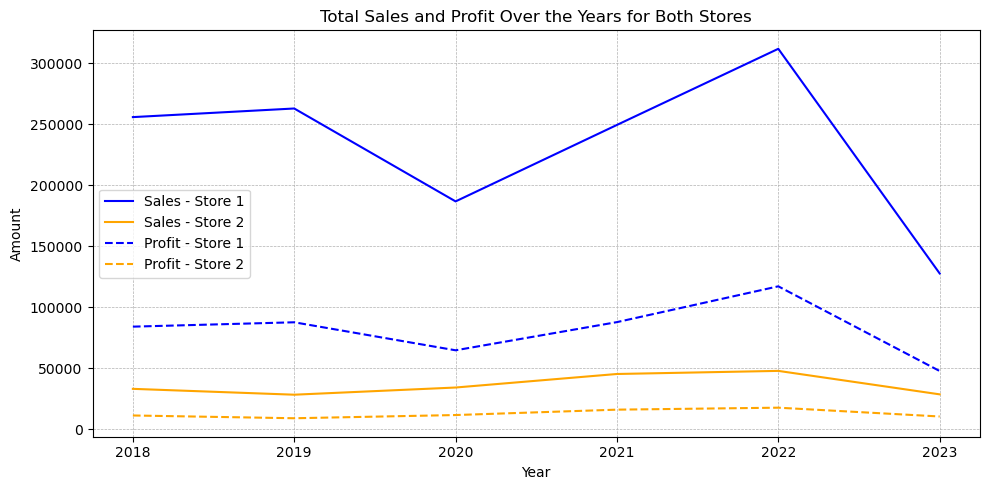

In [83]:
# Plotting the data for both sales and profit for each store
plt.figure(figsize=(10, 5))

# Plotting Sales
for store_id, color in zip([1, 2], ['blue', 'orange']):
    subset = sales_profit_analysis_yearly[sales_profit_analysis_yearly['Store_ID'] == store_id]
    plt.plot(subset['YEAR'], subset['TOTAL_SALES'], label=f'Sales - Store {store_id}', color=color, linestyle='-')
    
# Plotting Profit
for store_id, color in zip([1, 2], ['blue', 'orange']):
    subset = sales_profit_analysis_yearly[sales_profit_analysis_yearly['Store_ID'] == store_id]
    plt.plot(subset['YEAR'], subset['PROFIT'], label=f'Profit - Store {store_id}', color=color, linestyle='--')

plt.title('Total Sales and Profit Over the Years for Both Stores')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

*resume*

- Store 1: Sales seem to have an upward trend, with some fluctuations over the years. Given its longevity, it's possible that the store has established a loyal customer base over the years, contributing to sustained growth.

- Store 2: The sales trend also shows growth, but the sales volume is visibly smaller than that of Store 1. However, it's important to note that Store 2 has been operational since 2011, so it has fewer years of data compared to Store 1.
The chart highlights the performance difference between the two stores and suggests that longevity might play a role in customer loyalty and brand recognition, especially for Store 1. 

In [84]:
#Product most Profitable

In [85]:
# Extracting the YEAR from the DATE column
sales['YEAR'] = pd.to_datetime(sales['DATE']).dt.year

# Grouping by Store_ID, YEAR, and PRODUCT to get the total PROFIT for each product per store per year
product_profit = sales.groupby(['Store_ID', 'YEAR', 'PRODUCT']).agg({'PROFIT': 'sum'}).reset_index()

# Filtering the product with the highest profit for each Store and YEAR combination
max_profit_product = product_profit.sort_values('PROFIT', ascending=False).drop_duplicates(subset=['Store_ID', 'YEAR'])

max_profit_product


Store_ID  YEAR       PRODUCT   PROFIT
211         1  2022      NECKLACE 22182.38
163         1  2021      NECKLACE 16693.26
90          1  2019  WEDDING RING 14868.05
30          1  2018      NECKLACE 14281.44
118         1  2020      NECKLACE  9491.75
256         1  2023      NECKLACE  7363.16
428         2  2022      NECKLACE  2785.28
394         2  2021      NECKLACE  2490.67
463         2  2023   REPAIR ITEM  1984.80
353         2  2020       EARRING  1710.30
297         2  2018      NECKLACE  1680.96
331         2  2019      NECKLACE  1416.05

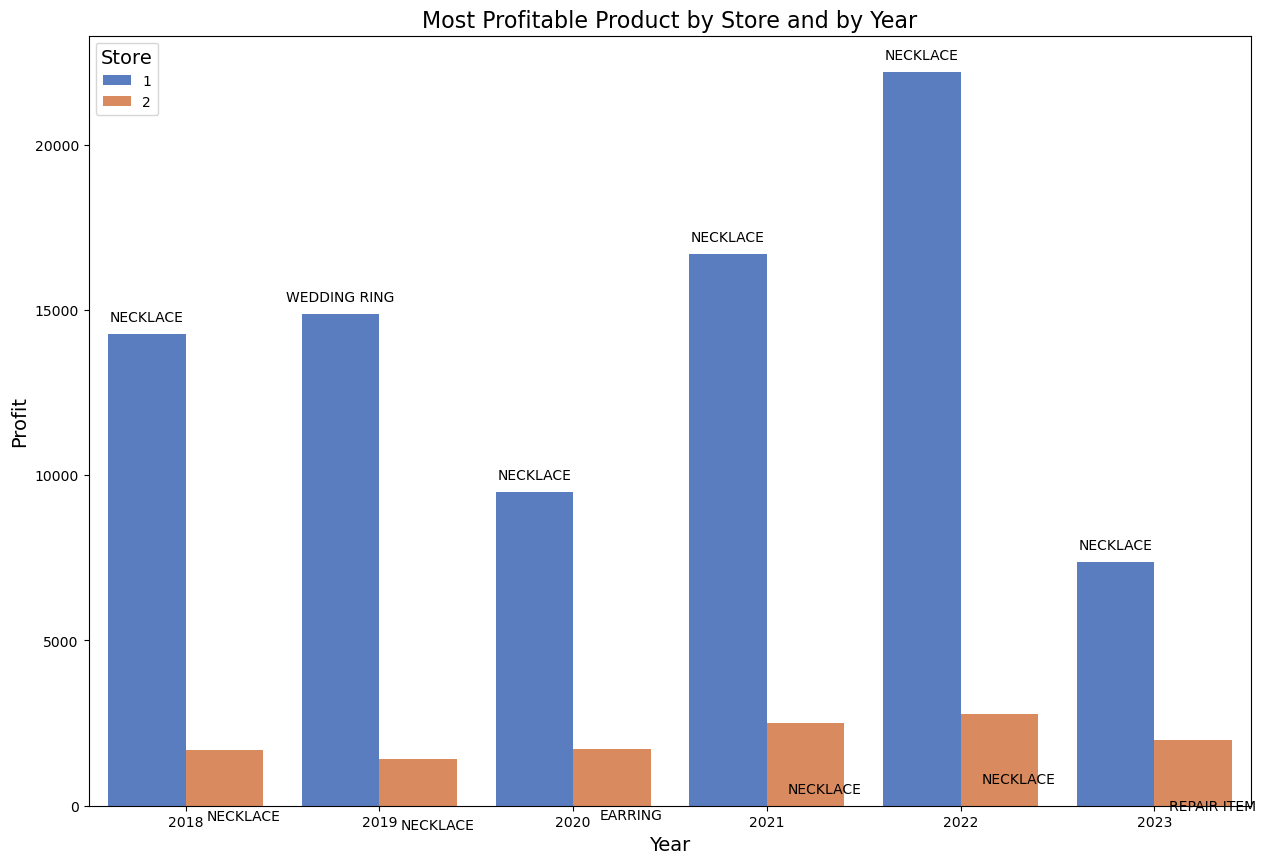

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the data
plt.figure(figsize=(15, 10))
sns.barplot(data=max_profit_product, x='YEAR', y='PROFIT', hue='Store_ID', errorbar=None, estimator=sum, palette="muted")

# Adding title and labels
plt.title('Most Profitable Product by Store and by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Profit', fontsize=14)
plt.legend(title='Store', title_fontsize='14', loc='upper left')

# Displaying the products as text on each bar
for index, value in enumerate(max_profit_product['PROFIT']):
    plt.text(max_profit_product['YEAR'].iloc[index] - 2018.2 + 0.5 * (max_profit_product['Store_ID'].iloc[index] - 1),
             value - 2000 if max_profit_product['Store_ID'].iloc[index] == 2 else value + 500,
             max_profit_product['PRODUCT'].iloc[index], 
             ha='center', 
             va='center', 
             rotation=0, 
             color='black', 
             fontsize=10)

plt.show()


### Product with the highest total discount for Store 1 and Store 2


In [87]:
max_discount1 = sales[sales['Store_ID'] == 1].groupby('PRODUCT').agg({'DISCOUNT': 'sum'}).idxmax().values[0]
max_discount2 = sales[sales['Store_ID'] == 2].groupby('PRODUCT').agg({'DISCOUNT': 'sum'}).idxmax().values[0]

print("The product with max discount on store 1 is: ", max_discount1)
print("The product with max discount on store 2 is: ", max_discount2)

The product with max discount on store 1 is:  WEDDING RING
The product with max discount on store 2 is:  WATCHES


### The evolution of sales of different products over the years for both stores

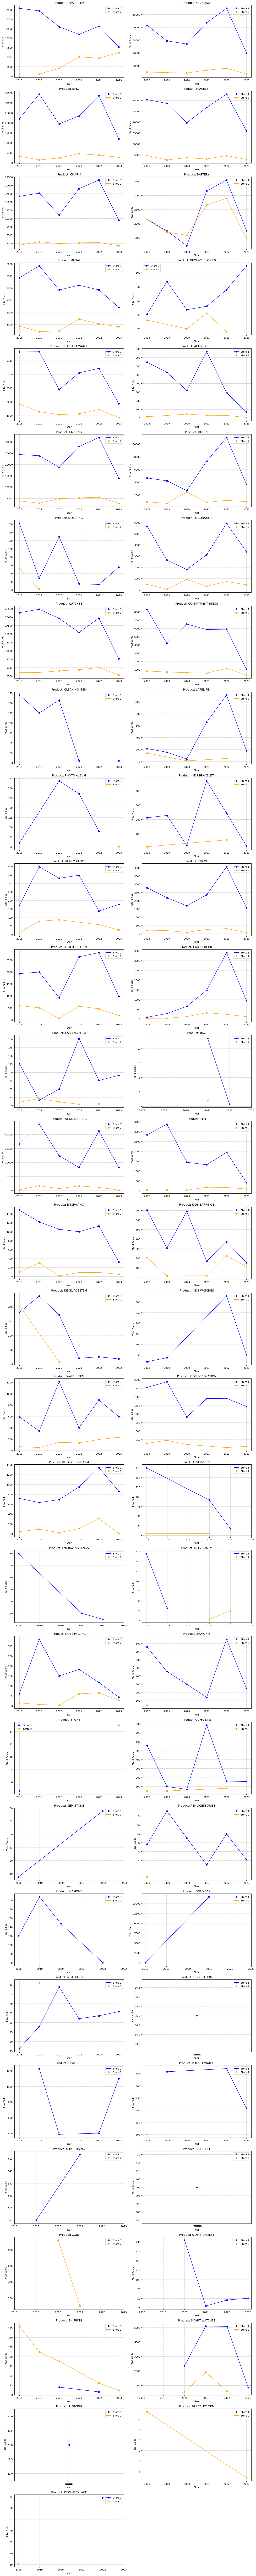

In [88]:
product_sales_evolution = sales.groupby(['PRODUCT', 'Store_ID', 'YEAR'])['TOTAL_SALES'].sum().reset_index()
# Determine the number of plots based on the number of unique products
unique_products = sales['PRODUCT'].unique()
number_of_rows = len(unique_products) // 2 + len(unique_products) % 2
graphs_per_row = 2

# Plotting the data for each product with the given colors
fig, axes = plt.subplots(nrows=number_of_rows, ncols=graphs_per_row, figsize=(15, 5 * number_of_rows))

# Adjusting the shape of the 'axes' variable for easier manipulation
if number_of_rows == 1 or graphs_per_row == 1:
    axes = axes.reshape(1, -1)

# Plotting the data for each product
for idx, product in enumerate(unique_products):
    row = idx // graphs_per_row
    col = idx % graphs_per_row
    
    product_data_store1 = product_sales_evolution[(product_sales_evolution['PRODUCT'] == product) & (product_sales_evolution['Store_ID'] == 1)]
    product_data_store2 = product_sales_evolution[(product_sales_evolution['PRODUCT'] == product) & (product_sales_evolution['Store_ID'] == 2)]
    
    axes[row, col].plot(product_data_store1['YEAR'], product_data_store1['TOTAL_SALES'], color='blue', label='Store 1', marker='o')
    axes[row, col].plot(product_data_store2['YEAR'], product_data_store2['TOTAL_SALES'], color='orange', label='Store 2', marker='o')
    
    axes[row, col].set_title(f'Product: {product}')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel('Total Sales')
    axes[row, col].legend()
    axes[row, col].grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Ensure only whole years are displayed on the Y-axis
    axes[row, col].set_xticks(product_sales_evolution['YEAR'].unique())

# Remove empty plots (if any)
for idx in range(len(unique_products), number_of_rows * graphs_per_row):
    row = idx // graphs_per_row
    col = idx % graphs_per_row
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()



### Monthly/semi-annual/annual sales trend to identify seasonal patterns

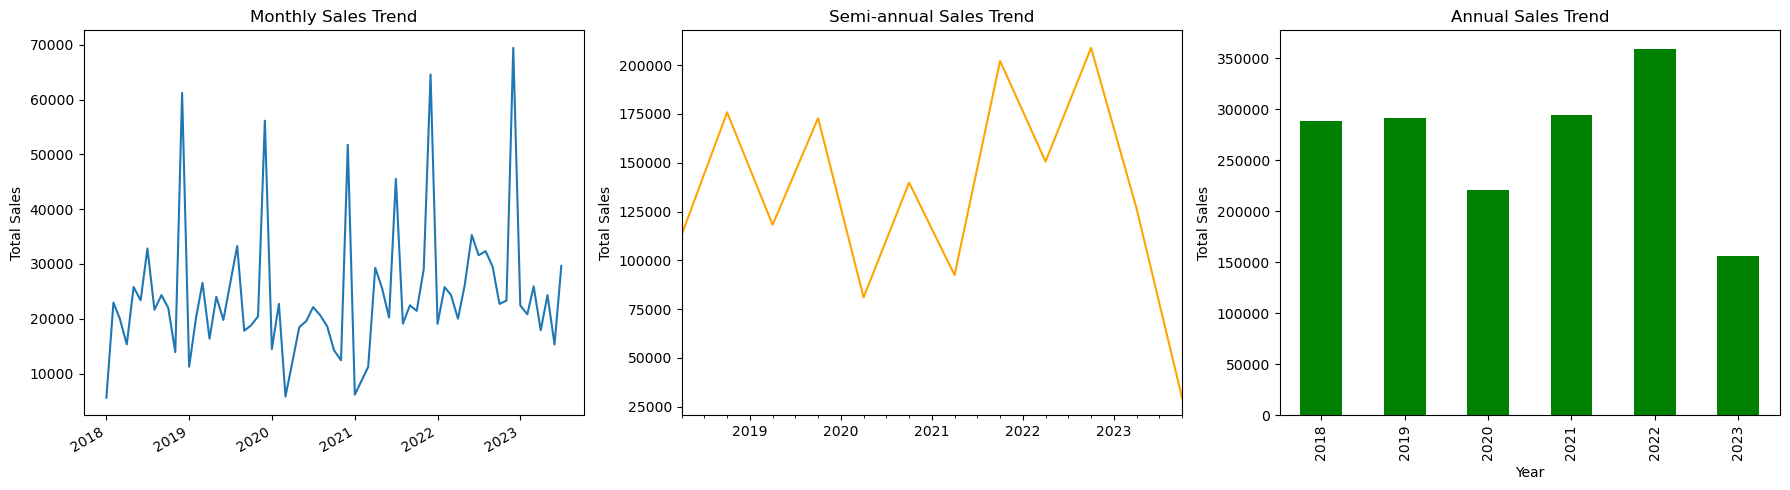

In [89]:
# Monthly Trend
monthly_sales_trend = sales.groupby(['YEAR', 'MONTH']).agg({'TOTAL_SALES': 'sum'}).reset_index()
monthly_sales_trend['DATE'] = pd.to_datetime(monthly_sales_trend[['YEAR', 'MONTH']].assign(DAY=1))
monthly_sales_trend.set_index('DATE', inplace=True)

# Semi-annual Trend
semestral_sales_trend = sales.copy()
semestral_sales_trend['SEMESTER'] = np.where(semestral_sales_trend['MONTH'] <= 6, 1, 2)
semestral_sales_trend = semestral_sales_trend.groupby(['YEAR', 'SEMESTER']).agg({'TOTAL_SALES': 'sum'}).reset_index()
semestral_sales_trend['DATE'] = pd.to_datetime(semestral_sales_trend['YEAR'].astype(str) + '-' + (semestral_sales_trend['SEMESTER']*6).astype(str) + '-01')
semestral_sales_trend.set_index('DATE', inplace=True)

# Annual Trend
annual_sales_trend = sales.groupby(['YEAR']).agg({'TOTAL_SALES': 'sum'})

# Plotting the trends
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
monthly_sales_trend['TOTAL_SALES'].plot(title='Monthly Sales Trend')
plt.xlabel('')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 2)
semestral_sales_trend['TOTAL_SALES'].plot(title='Semi-annual Sales Trend', color='orange')
plt.xlabel('')
plt.ylabel('Total Sales')

plt.subplot(1, 3, 3)
annual_sales_trend['TOTAL_SALES'].plot(title='Annual Sales Trend', kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

In [90]:
# # Extracting YEAR and MONTH from DATE if not already present
if 'YEAR' not in sales.columns or 'MONTH' not in sales.columns:
    sales['YEAR'] = pd.to_datetime(sales['DATE']).dt.year
    sales['MONTH'] = pd.to_datetime(sales['DATE']).dt.month

# Monthly Trend
monthly_sales_trend = sales.groupby(['YEAR', 'MONTH']).agg({'TOTAL_SALES': 'sum'}).reset_index()
monthly_sales_trend['DATE'] = pd.to_datetime(monthly_sales_trend[['YEAR', 'MONTH']].assign(DAY=1))
monthly_sales_trend.set_index('DATE', inplace=True)

# Semi-annual Trend
semestral_sales_trend = sales.copy()
semestral_sales_trend['SEMESTER'] = np.where(semestral_sales_trend['MONTH'] <= 6, 1, 2)
semestral_sales_trend = semestral_sales_trend.groupby(['YEAR', 'SEMESTER']).agg({'TOTAL_SALES': 'sum'}).reset_index()
semestral_sales_trend['DATE'] = pd.to_datetime(semestral_sales_trend['YEAR'].astype(str) + '-' + (semestral_sales_trend['SEMESTER']*6).astype(str) + '-01')
semestral_sales_trend.set_index('DATE', inplace=True)

# Annual Trend
annual_sales_trend = sales.groupby(['YEAR']).agg({'TOTAL_SALES': 'sum'})

# Semi-annual Trend for each store
semestral_sales_trend_store_1 = sales[sales['Store_ID'] == 1].copy()
semestral_sales_trend_store_1['SEMESTER'] = np.where(semestral_sales_trend_store_1['MONTH'] <= 6, 1, 2)
semestral_sales_trend_store_1 = semestral_sales_trend_store_1.groupby(['YEAR', 'SEMESTER']).agg({'TOTAL_SALES': 'sum'}).reset_index()
semestral_sales_trend_store_1['DATE'] = pd.to_datetime(semestral_sales_trend_store_1['YEAR'].astype(str) + '-' + (semestral_sales_trend_store_1['SEMESTER']*6).astype(str) + '-01')
semestral_sales_trend_store_1.set_index('DATE', inplace=True)

semestral_sales_trend_store_2 = sales[sales['Store_ID'] == 2].copy()
semestral_sales_trend_store_2['SEMESTER'] = np.where(semestral_sales_trend_store_2['MONTH'] <= 6, 1, 2)
semestral_sales_trend_store_2 = semestral_sales_trend_store_2.groupby(['YEAR', 'SEMESTER']).agg({'TOTAL_SALES': 'sum'}).reset_index()
semestral_sales_trend_store_2['DATE'] = pd.to_datetime(semestral_sales_trend_store_2['YEAR'].astype(str) + '-' + (semestral_sales_trend_store_2['SEMESTER']*6).astype(str) + '-01')
semestral_sales_trend_store_2.set_index('DATE', inplace=True)

# Monthly trend for each store
monthly_sales_trend_store_1 = sales[sales['Store_ID'] == 1].groupby(['YEAR', 'MONTH']).agg({'TOTAL_SALES': 'sum'}).reset_index()
monthly_sales_trend_store_1['DATE'] = pd.to_datetime(monthly_sales_trend_store_1[['YEAR', 'MONTH']].assign(DAY=1))
monthly_sales_trend_store_1.set_index('DATE', inplace=True)

monthly_sales_trend_store_2 = sales[sales['Store_ID'] == 2].groupby(['YEAR', 'MONTH']).agg({'TOTAL_SALES': 'sum'}).reset_index()
monthly_sales_trend_store_2['DATE'] = pd.to_datetime(monthly_sales_trend_store_2[['YEAR', 'MONTH']].assign(DAY=1))
monthly_sales_trend_store_2.set_index('DATE', inplace=True)

# Annual trend for each store
annual_sales_trend_store_1 = sales[sales['Store_ID'] == 1].groupby(['YEAR']).agg({'TOTAL_SALES': 'sum'})
annual_sales_trend_store_2 = sales[sales['Store_ID'] == 2].groupby(['YEAR']).agg({'TOTAL_SALES': 'sum'})

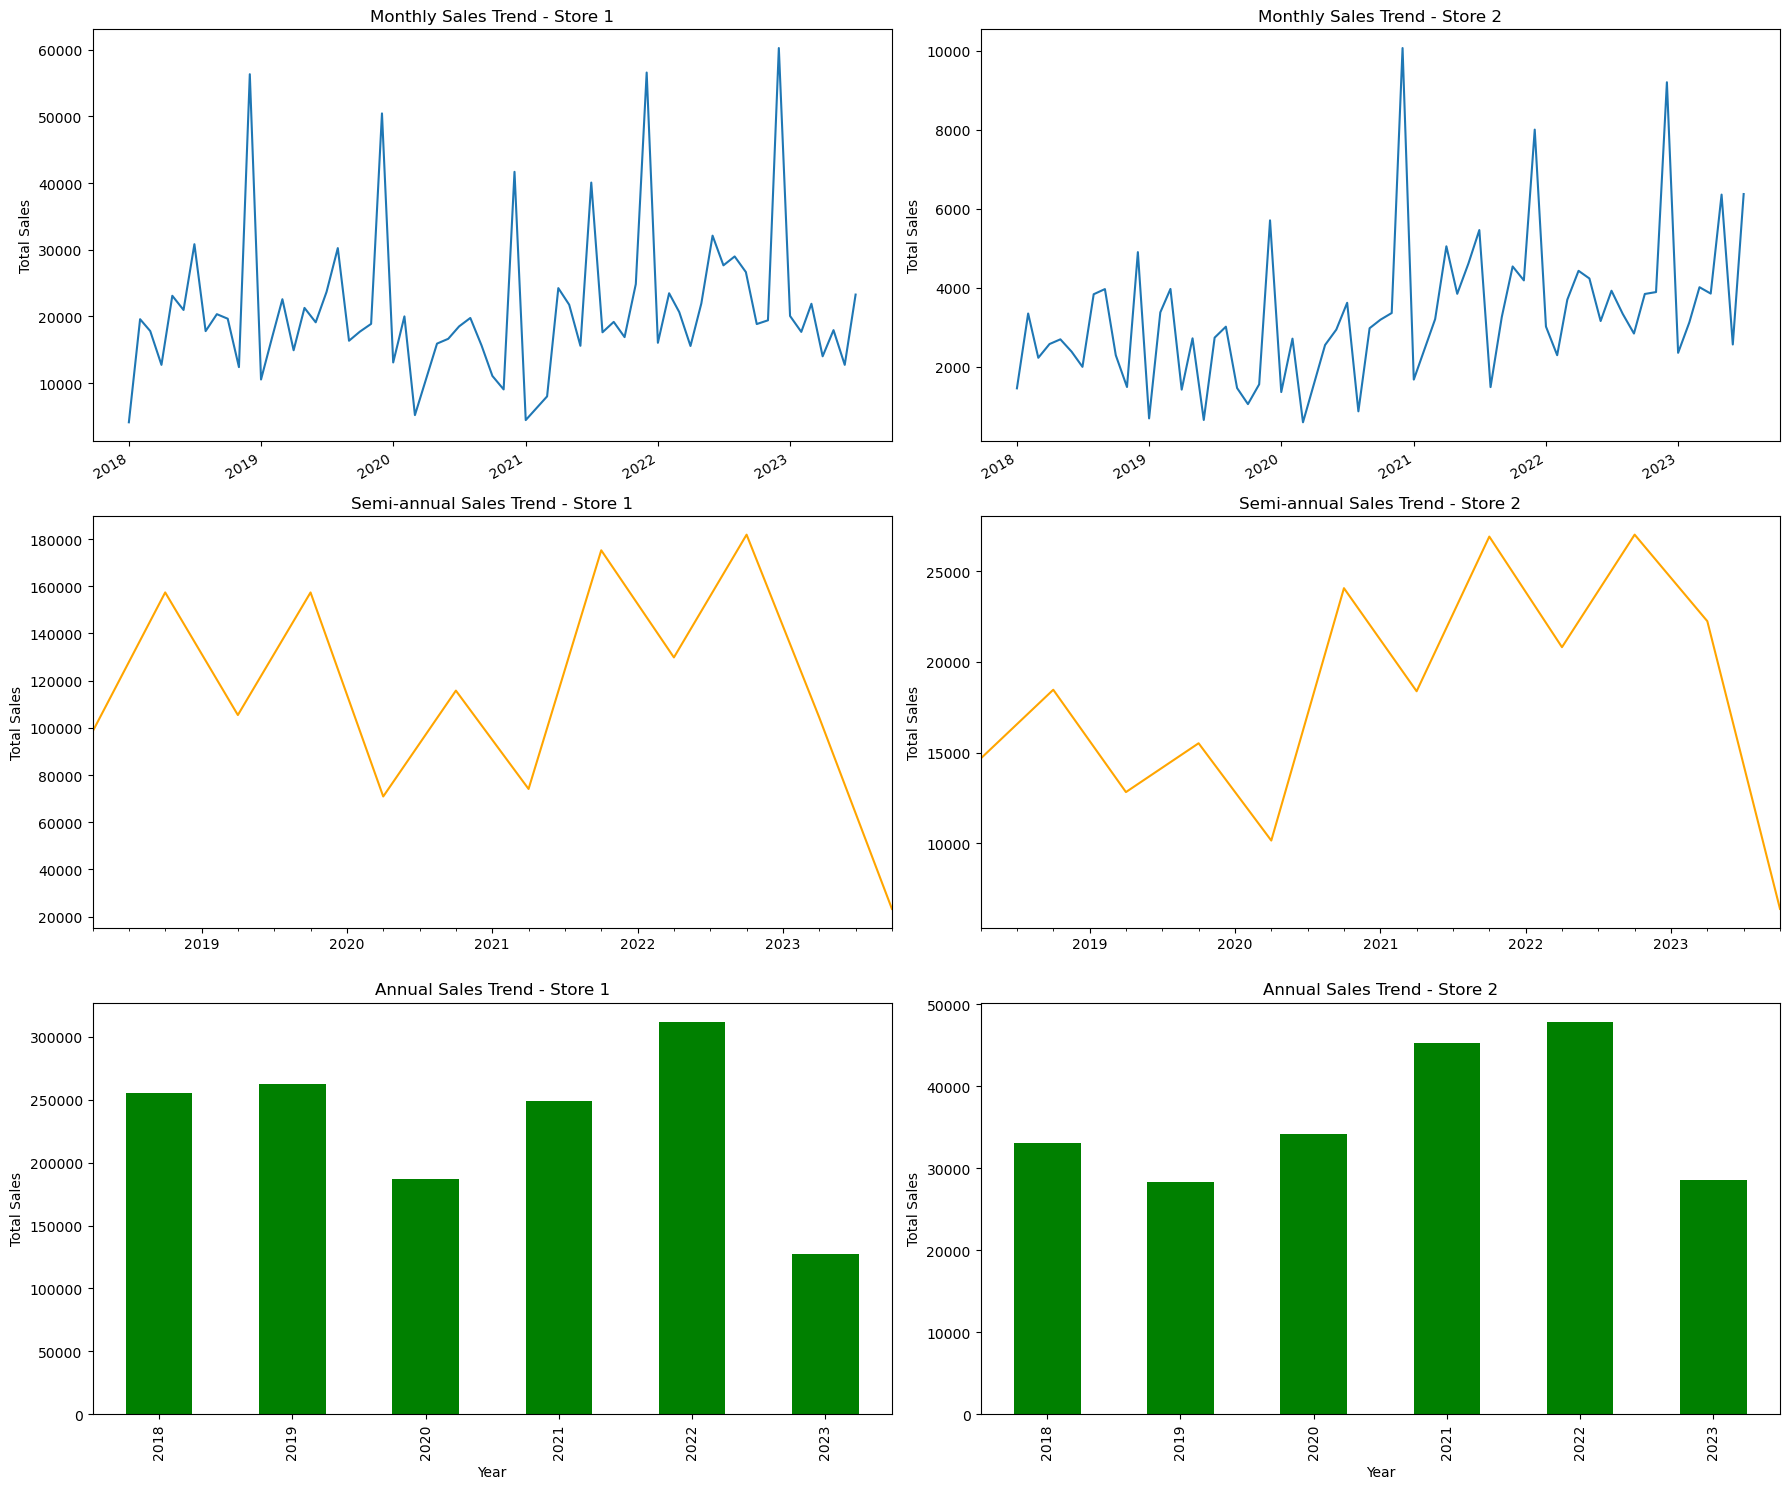

In [91]:
# Plotting the trends

# Setup
plt.figure(figsize=(18, 15))

# Monthly Trend
plt.subplot(3, 2, 1)
monthly_sales_trend_store_1['TOTAL_SALES'].plot(title='Monthly Sales Trend - Store 1')
plt.xlabel('')
plt.ylabel('Total Sales')

plt.subplot(3, 2, 2)
monthly_sales_trend_store_2['TOTAL_SALES'].plot(title='Monthly Sales Trend - Store 2')
plt.xlabel('')
plt.ylabel('Total Sales')

# Semi-annual Trend
plt.subplot(3, 2, 3)
semestral_sales_trend_store_1['TOTAL_SALES'].plot(title='Semi-annual Sales Trend - Store 1', color='orange')
plt.xlabel('')
plt.ylabel('Total Sales')

plt.subplot(3, 2, 4)
semestral_sales_trend_store_2['TOTAL_SALES'].plot(title='Semi-annual Sales Trend - Store 2', color='orange')
plt.xlabel('')
plt.ylabel('Total Sales')

# Annual Trend
plt.subplot(3, 2, 5)
annual_sales_trend_store_1['TOTAL_SALES'].plot(title='Annual Sales Trend - Store 1', kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.subplot(3, 2, 6)
annual_sales_trend_store_2['TOTAL_SALES'].plot(title='Annual Sales Trend - Store 2', kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()

*Resume*
- Monthly Sales Trend:
Both stores exhibit a similar monthly trend in sales, with noticeable peaks and valleys.
Store 1 generally has higher sales than Store 2 across most months.
Certain months show a closer performance between the two stores, while in others, Store 1's sales are significantly higher.
Semi-annual Sales Trend:

- On a semi-annual basis, the trends for both stores align closely, showcasing a similar pattern in sales evolution.
Again, Store 1 dominates in terms of total sales when compared to Store 2 for both halves of the year.
Annual Sales Trend:

- The bar chart provides a clear picture of the annual sales differences between the two stores.
Store 1 consistently outperforms Store 2 on an annual basis. The difference in sales is especially pronounced in certain years.
There's a steady growth in sales for both stores, but the growth rate for Store 2 seems to be slightly higher in the later years, potentially indicating it's catching up.

Overall:
Store 1 consistently achieves higher sales than Store 2 across all periods. While both stores exhibit similar sales patterns, the magnitude of sales is higher for Store 1. This could be attributed to various factors, such as location, store size, marketing efforts, or customer base. Store 2, however, shows promise in its growth rate, especially in the recent years, suggesting it might be building its customer base or implementing effective sales strategies.

## Sales variation based on Seller

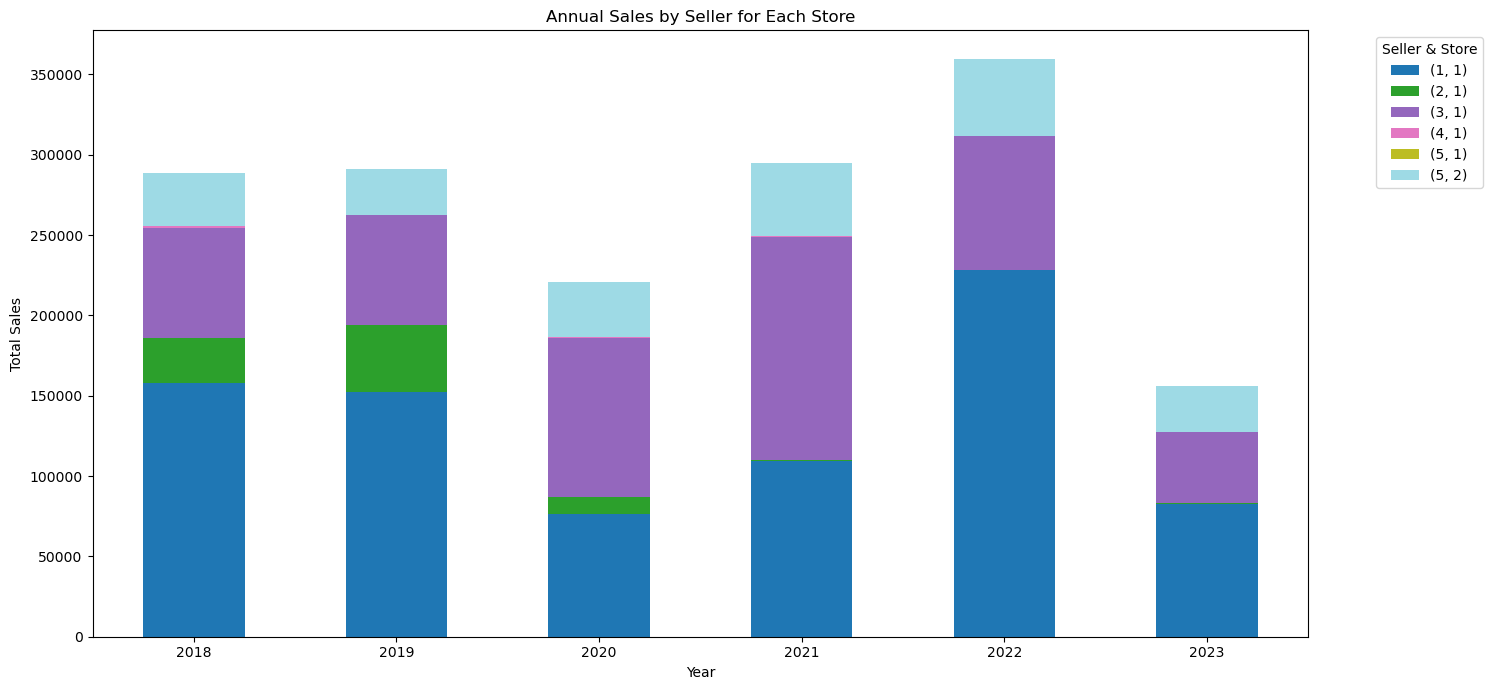

In [92]:
# Grouping sales by year, seller, and store ID to get the annual sales for each seller in each store
annual_sales_by_seller = sales.groupby(['YEAR', 'SELLER', 'Store_ID']).agg({'TOTAL_SALES': 'sum'}).reset_index()

# Pivoting the data for the stacked bar chart
sales_by_seller_pivot = annual_sales_by_seller.pivot_table(index='YEAR', columns=['SELLER', 'Store_ID'], values='TOTAL_SALES').fillna(0)

# Adjusting the x-axis to show years as integers
ax = sales_by_seller_pivot.plot(kind='bar', stacked=True, figsize=(15, 7), colormap="tab20")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title('Annual Sales by Seller for Each Store')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Seller & Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This visualization provides a clear comparative view of the sales contributions from different sellers across the two stores for each year. You can easily discern which sellers are consistently top performers and which ones might need additional support or training

## Cross Selling Anciliry Products 

"Cross-selling" refers to the practice of selling an additional product or service to an existing customer. In terms of data analysis, we typically look for patterns in the data where customers who purchase one product also tend to purchase another. Here's how you can approach cross-selling or upselling analysis using your dataset:

*Basket Analysis:*

A common approach to identify cross-selling opportunities is through basket analysis. This involves looking at combinations of products that frequently appear together in a single transaction.
The association rule mining technique, like the Apriori algorithm, is often used to identify these product combinations.

How to do it:

First, transform your data so that each transaction (or invoice) is a row and each product is a column. The values in the cells would indicate the quantity of each product in the transaction.
Next, use an algorithm like Apriori to identify frequent product sets and create association rules.
From these rules, you can identify cross-selling opportunities. For instance, if many customers who buy product A also buy product B, but not many customers who buy product B also buy product A, there might be an opportunity to cross-sell product B to customers buying product A.

In [93]:
# Transforming the dataset for basket analysis
basket = sales.groupby(['Sales_ID', 'PRODUCT'])['QTD'].sum().unstack().reset_index().fillna(0)

# Converting quantity values to 1 (purchased) or 0 (not purchased)
basket_set = basket.applymap(lambda x: 1 if x > 0 else 0)
basket_set.drop('Sales_ID', inplace=True, axis=1)

basket_set.head()

PRODUCT  ACESSORIES  ADVERTISING  ALARM CLOCK  BAG  BATTERY  BRACELET  \
0                 0            0            0    0        0         0   
1                 0            0            0    0        0         0   
2                 0            0            0    0        0         0   
3                 0            0            0    0        0         0   
4                 0            0            0    0        0         0   

PRODUCT  BRACELET   BRACELET ITEM  BRACELET WATCH  CHARM  ...  RELIGIOUS ITEM  \
0                1              0               0      0  ...               0   
1                0              0               0      1  ...               0   
2                0              0               0      0  ...               0   
3                0              0               0      0  ...               0   
4                0              0               0      0  ...               0   

PRODUCT  REPAIR ITEM  RING  SERVICES  SHIPPING  SMART WATCHES  STONE  \
0                  0     0         0         0              0      0   
1                  0     0         0         0              0      0   
2                  0     0         0         0              0      0   
3                  0     0         0         0              0      0   
4                  0     0         0         0              0      0   

PRODUCT  WATCH ITEM  WATCHES  WEDDING RING  
0                 0        0             0  
1                 0        0             0  
2                 0        0             0  
3                 0        0             0  
4                 0        1             0  

[5 rows x 59 columns]

In [94]:
# Applying the Apriori algorithm
frequent_itemsets = apriori(basket_set, min_support=0.01, use_colnames=True)

# Sorting by support
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

frequent_itemsets.head()

c:\Users\USER\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


support       itemsets
0      0.19      (BATTERY)
11     0.18  (REPAIR ITEM)
7      0.12      (EARRING)
10     0.11     (NECKLACE)
1      0.09    (BRACELET )

In [95]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules = rules.sort_values(by='lift', ascending=False)
rules

antecedents       consequents  antecedent support  consequent support  \
2           (CHARM)        (NECKLACE)                0.07                0.11   
3        (NECKLACE)           (CHARM)                0.11                0.07   
0  (BRACELET WATCH)         (BATTERY)                0.07                0.19   
1         (BATTERY)  (BRACELET WATCH)                0.19                0.07   

   support  confidence  lift  leverage  conviction  zhangs_metric  
2     0.01        0.19  1.79      0.01        1.10           0.48  
3     0.01        0.13  1.79      0.01        1.07           0.49  
0     0.02        0.25  1.31      0.00        1.08           0.26  
1     0.02        0.09  1.31      0.00        1.02           0.30

*Resume*

- *#antecedents*: The item (or set of items) that is frequently bought first.
- *#consequents*: The item (or set of items) that is frequently bought after the "antecedents" item.
- *#antecedent* support: Proportion of transactions that contain the "antecedents" item.
- *#consequent* support: Proportion of transactions that contain the "consequents" item.
- *#support*: Proportion of transactions that contain both "antecedents" and "consequents" items.
- *#confidence*: Probability of a customer purchasing the "consequents" item given that they have already purchased the "antecedents" item.
- *#lift*: Indicates how much more likely the "consequents" is to be bought when the "antecedents" is purchased, compared to the likelihood of buying the "consequents" on its own. A "lift" value greater than 1 indicates a significant relationship between the two items.
- *#leverage*: The difference between the probability of both items being bought together and the expected probability if they were independent. Positive values indicate a positive association between the items.
- *#conviction*: Measures the dependency of the "consequents" on the "antecedents". A high value indicates that the "consequents" is highly dependent on the "antecedents".
- *#zhangs_metric*: A metric that measures the difference between the observed and expected probability of both items occurring together.

From these results, we can infer:

Customers who purchase a "CHARM" are 1.79 times more likely to purchase a "NECKLACE" compared to customers who don't purchase a "CHARM".
Customers who purchase a "BRACELET WATCH" are 1.31 times more likely to purchase a "BATTERY" compared to customers who don't purchase a "BRACELET WATCH".

In [96]:
#pickle table rules to export to streamlit
import pickle 
rules.to_pickle("crossproducts.pkl")

## Influence of Temperature, Rain, and Cloud Cover on Sales

In [97]:
descriptive_stats = sales[['TEMPERATURE', 'PRECIPITATION', 'CLOUDCOVER(%)']].describe().round(2)
descriptive_stats


TEMPERATURE  PRECIPITATION  CLOUDCOVER(%)
count     43335.00       43335.00       43335.00
mean         18.68           0.06          33.43
std           4.37           0.21          29.06
min           7.63           0.00           0.00
25%          15.02           0.00           6.83
50%          18.28           0.00          26.92
75%          22.11           0.00          53.25
max          35.75           4.37         100.00

*TOTAL_SALES:*
- The average sales is approximately 37.18.
- The standard deviation is high (100.9), indicating considerable variation in sales.
- The minimum value is -670, suggesting some returns or discounts.
- The maximum value is 3500.

*TEMPERATURE:*
- The average temperature is approximately 18.68°C.
- The temperature varies between 7.63°C and 35.75°C.

*PRECIPITATION:*
- The average precipitation is 0.055mm.
- 75% of the data has precipitation of 0mm, indicating that most days have no precipitation.
- The maximum recorded precipitation is 4.37mm.

*CLOUDCOVER(%):*
- The average cloud cover is 33.43%.
- Cloud cover ranges from 0% to 100%.

In [98]:
# Calculating the correlation between sales and meteorological factors
correlation_matrix = sales[['TOTAL_SALES', 'TEMPERATURE', 'PRECIPITATION', 'CLOUDCOVER(%)']].corr()
correlation_matrix['TOTAL_SALES']

TOTAL_SALES      1.00
TEMPERATURE     -0.00
PRECIPITATION    0.00
CLOUDCOVER(%)    0.01
Name: TOTAL_SALES, dtype: float64

Based on these correlations, it appears that meteorological factors do not have a strong linear relationship with sales. However, to have a clearer visualization, we can plot scatter plots between sales and each of the meteorological factors.

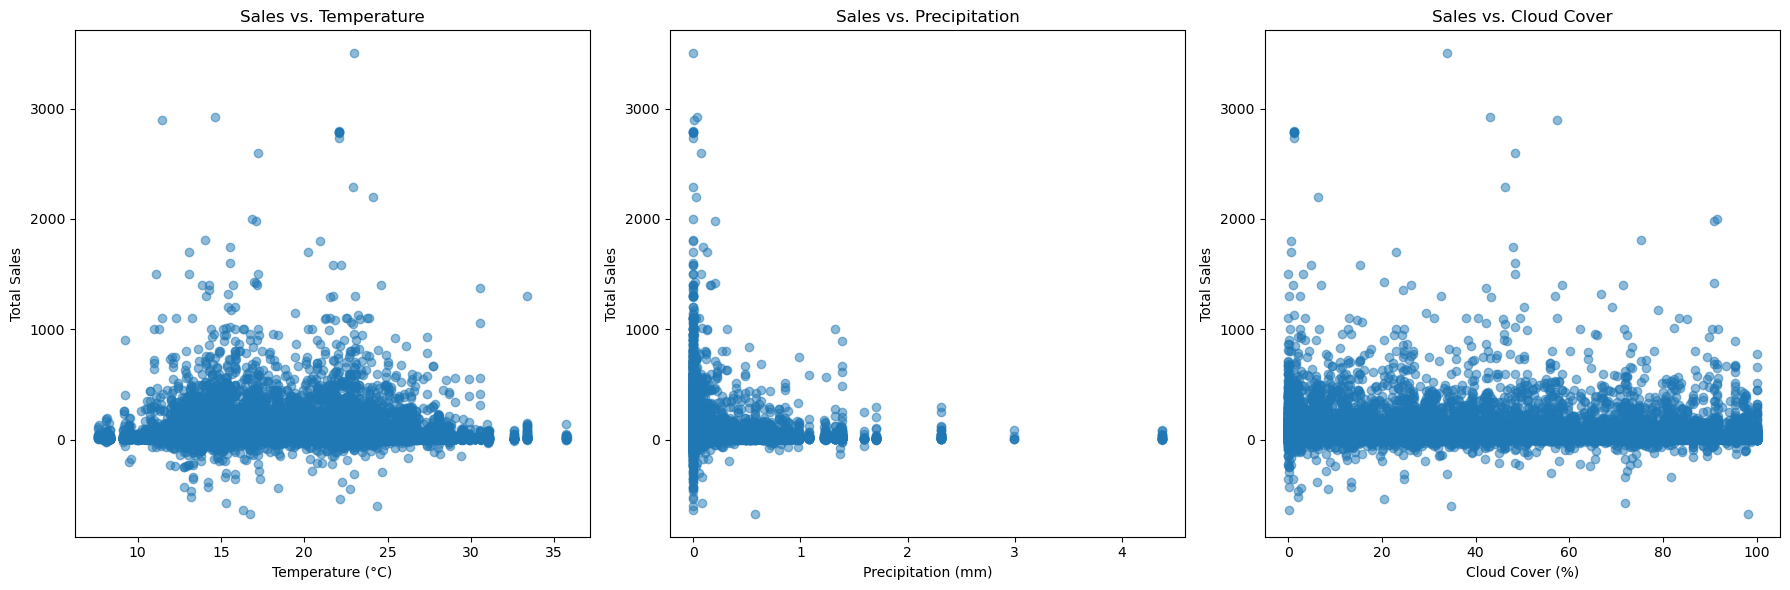

In [99]:
# Plotting scatter plots for sales vs. meteorological factors
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Sales vs. Temperature
axes[0].scatter(sales['TEMPERATURE'], sales['TOTAL_SALES'], alpha=0.5)
axes[0].set_title('Sales vs. Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Total Sales')

# Sales vs. Precipitation
axes[1].scatter(sales['PRECIPITATION'], sales['TOTAL_SALES'], alpha=0.5)
axes[1].set_title('Sales vs. Precipitation')
axes[1].set_xlabel('Precipitation (mm)')
axes[1].set_ylabel('Total Sales')

# Sales vs. Cloud Cover
axes[2].scatter(sales['CLOUDCOVER(%)'], sales['TOTAL_SALES'], alpha=0.5)
axes[2].set_title('Sales vs. Cloud Cover')
axes[2].set_xlabel('Cloud Cover (%)')
axes[2].set_ylabel('Total Sales')

plt.tight_layout()
plt.show()

*scatter plots for sales versus each of the meteorological factors*

- Sales vs. Temperature: No clear trend is observed, which is consistent with the near-zero correlation.
- Sales vs. Precipitation: Most points are concentrated at low precipitation values. No clear trend between precipitation and sales is observed.
- Sales vs. Cloud Cover: The dispersion is wide, and no clear trend is observed.

The plots confirm the conclusions drawn from the correlations. It appears that in this dataset, meteorological factors do not have a direct and linear impact on sales.

Here is the chart of monthly sales over time. From the chart, we can observe some trends and patterns in sales:

There seems to be an upward trend in sales, indicating overall growth in sales over time.
There are some observable seasonal fluctuations, with apparent peaks in certain months and drops in others. 

## Payment salary influence consumer behavior?

The period after salary payments can indeed influence consumer buying behavior.

Let's proceed as follows:

- Segmentation by Payment Date: First, we will segment the data into two groups: the days close to the payment period (days 21 to 31 of each month) and the other days.

- Statistical Analysis: Next, we will conduct a statistical test to compare the sales averages between these two groups, in order to determine if there is a significant difference.

- Visualization: We will also visualize the daily sales throughout the month to observe any trends or patterns that may emerge around the payment period.


### Segmentation by Payment Date and Visualization Total Stores

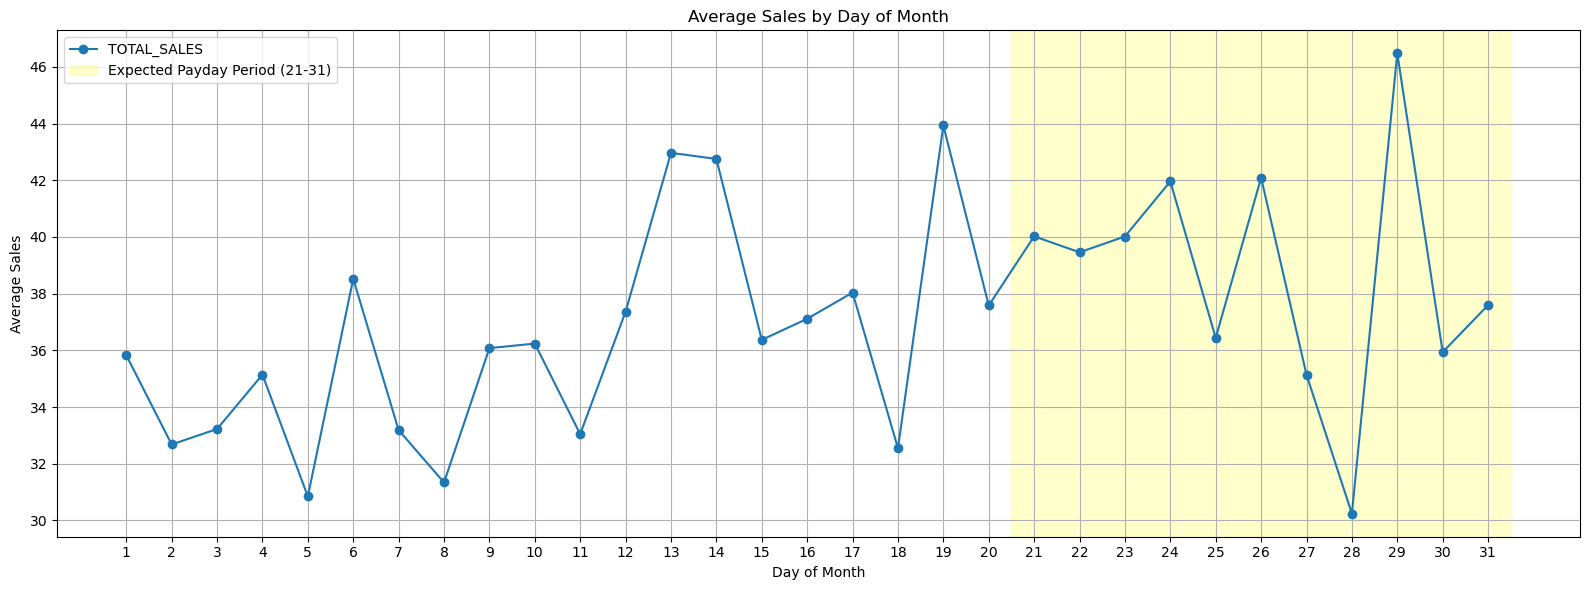

In [100]:
# Extracting day of the month from the DATE column
sales['DAY_OF_MONTH'] = sales['DATE'].dt.day

# Calculating average sales for each day of the month
average_sales_by_day = sales.groupby('DAY_OF_MONTH').mean(numeric_only=True)['TOTAL_SALES']


# Plotting average sales by day of the month
plt.figure(figsize=(16, 6))
average_sales_by_day.plot(kind='line', marker='o', linestyle='-')
plt.axvspan(20.5, 31.5, color='yellow', alpha=0.2, label='Expected Payday Period (21-31)')
plt.title('Average Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.xticks(list(range(1, 32)))
plt.tight_layout()
plt.show()

### Segmentation by Payment Date and Visualization Store 1 & 2 

C:\Users\USER\AppData\Local\Temp\ipykernel_12704\451298662.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sales_by_day_store_1 = store_1_sales.groupby('DAY_OF_MONTH').mean()['TOTAL_SALES']
C:\Users\USER\AppData\Local\Temp\ipykernel_12704\451298662.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_sales_by_day_store_2 = store_2_sales.groupby('DAY_OF_MONTH').mean()['TOTAL_SALES']


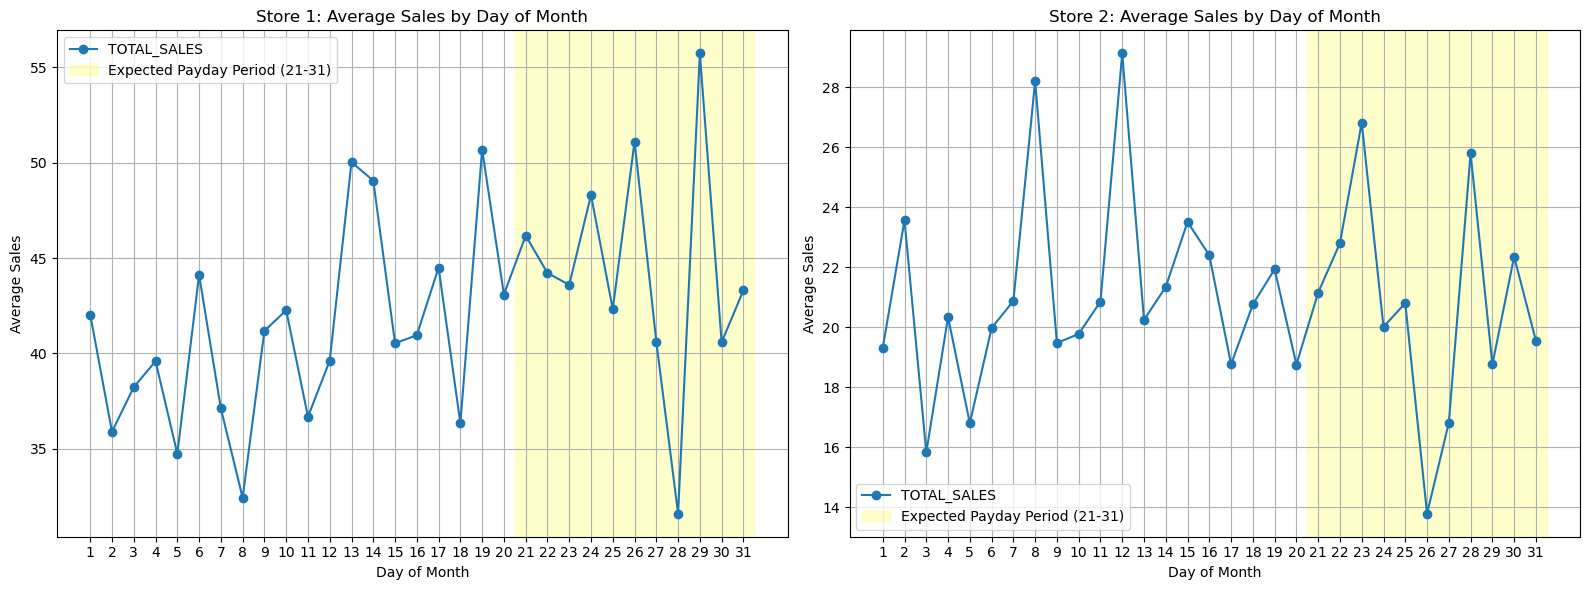

In [101]:
# Segmenting the data by store
store_1_sales = sales[sales['Store_ID'] == 1].copy()
store_2_sales = sales[sales['Store_ID'] == 2].copy()

# Extracting day of the month for each store
store_1_sales['DAY_OF_MONTH'] = store_1_sales['DATE'].dt.day
store_2_sales['DAY_OF_MONTH'] = store_2_sales['DATE'].dt.day

# Calculating average sales for each day of the month for each store
average_sales_by_day_store_1 = store_1_sales.groupby('DAY_OF_MONTH').mean()['TOTAL_SALES']
average_sales_by_day_store_2 = store_2_sales.groupby('DAY_OF_MONTH').mean()['TOTAL_SALES']

# Plotting average sales by day of the month for Store 1
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
average_sales_by_day_store_1.plot(kind='line', marker='o', linestyle='-')
plt.axvspan(20.5, 31.5, color='yellow', alpha=0.2, label='Expected Payday Period (21-31)')
plt.title('Store 1: Average Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.xticks(list(range(1, 32)))

# Plotting average sales by day of the month for Store 2
plt.subplot(1, 2, 2)
average_sales_by_day_store_2.plot(kind='line', marker='o', linestyle='-')
plt.axvspan(20.5, 31.5, color='yellow', alpha=0.2, label='Expected Payday Period (21-31)')
plt.title('Store 2: Average Sales by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Average Sales')
plt.legend()
plt.grid(True)
plt.xticks(list(range(1, 32)))

plt.tight_layout()
plt.show()


In both graphs, the period highlighted in yellow (days 21 to 31) represents the expected payday period. This visualization allows us to observe sales trends throughout the month and see if there are noticeable spikes or changes around the payday period.

From a preliminary observation, it seems there might be some slight increase in sales towards the end of the month for Store 1, but the pattern is not very pronounced for Store 2. 

To better understand, we will now conduct a statistical analysis to compare the average sales between the days of the payment period and the other days.

H0 (Null Hypothesis): The average sales during the payday period (days 21-31) is equal to the average sales during the other days of the month.

H1 (Alternative Hypothesis): The average sales during the payday period (days 21-31) is not equal to the average sales during the other days of the month.

In [102]:
# Segmenting sales data for Store 1 based on the payday period (21-31) and other days
store_1_payday_sales = store_1_sales[store_1_sales['DAY_OF_MONTH'].between(21, 31)]['TOTAL_SALES']
store_1_non_payday_sales = store_1_sales[~store_1_sales['DAY_OF_MONTH'].between(21, 31)]['TOTAL_SALES']

# Performing the t-test for Store 1
t_stat_store_1, p_val_store_1 = ttest_ind(store_1_payday_sales, store_1_non_payday_sales, equal_var=False)

# Segmenting sales data for Store 2 based on the payday period (21-31) and other days
store_2_payday_sales = store_2_sales[store_2_sales['DAY_OF_MONTH'].between(21, 31)]['TOTAL_SALES']
store_2_non_payday_sales = store_2_sales[~store_2_sales['DAY_OF_MONTH'].between(21, 31)]['TOTAL_SALES']

# Performing the t-test for Store 2
t_stat_store_2, p_val_store_2 = ttest_ind(store_2_payday_sales, store_2_non_payday_sales, equal_var=False)

t_stats_and_p_values = {
    'Store 1': (t_stat_store_1, p_val_store_1),
    'Store 2': (t_stat_store_2, p_val_store_2)
}

t_stats_and_p_values

{'Store 1': (2.295693494611961, 0.02170291185160541),
 'Store 2': (-0.09461037314507473, 0.9246267197310155)}

Store 1:
The p-value (0.0156) is less than the commonly used significance level of 0.05. This means that we can reject the null hypothesis (H0 ) for Store 1. In other words, there is statistically significant evidence to suggest that the average sales during the payday period (days 21-31) is different from the average sales during the other days of the month for Store 1.

Store 2:
The p-value (0.7175) is much greater than 0.05. This means that we fail to reject the null hypothesis (H0) for Store 2. There isn't enough statistical evidence to suggest that the average sales during the payday period (days 21-31) are different from the average sales during the other days of the month for Store 2.

Conclusions:

Store 1: There is a statistically significant difference in average sales between the payday period and other days of the month. This suggests that the payday period might have an influence on sales for Store 1.
Store 2: There is no statistically significant difference in average sales between the payday period and other days of the month. The payday period doesn't seem to influence sales for Store 2, at least not to a statistically significant degree.

## Consumer Profile

#### Average Sales by Gender: Determine the average sales for each gender and check if there are significant differences.

C:\Users\USER\AppData\Local\Temp\ipykernel_12704\3701026210.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_1_gender_data.groupby('GENDER').mean()['TOTAL_SALES'].plot(kind='bar', color=['pink', 'lightblue'])
C:\Users\USER\AppData\Local\Temp\ipykernel_12704\3701026210.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_2_gender_data.groupby('GENDER').mean()['TOTAL_SALES'].plot(kind='bar', color=['pink', 'lightblue'])


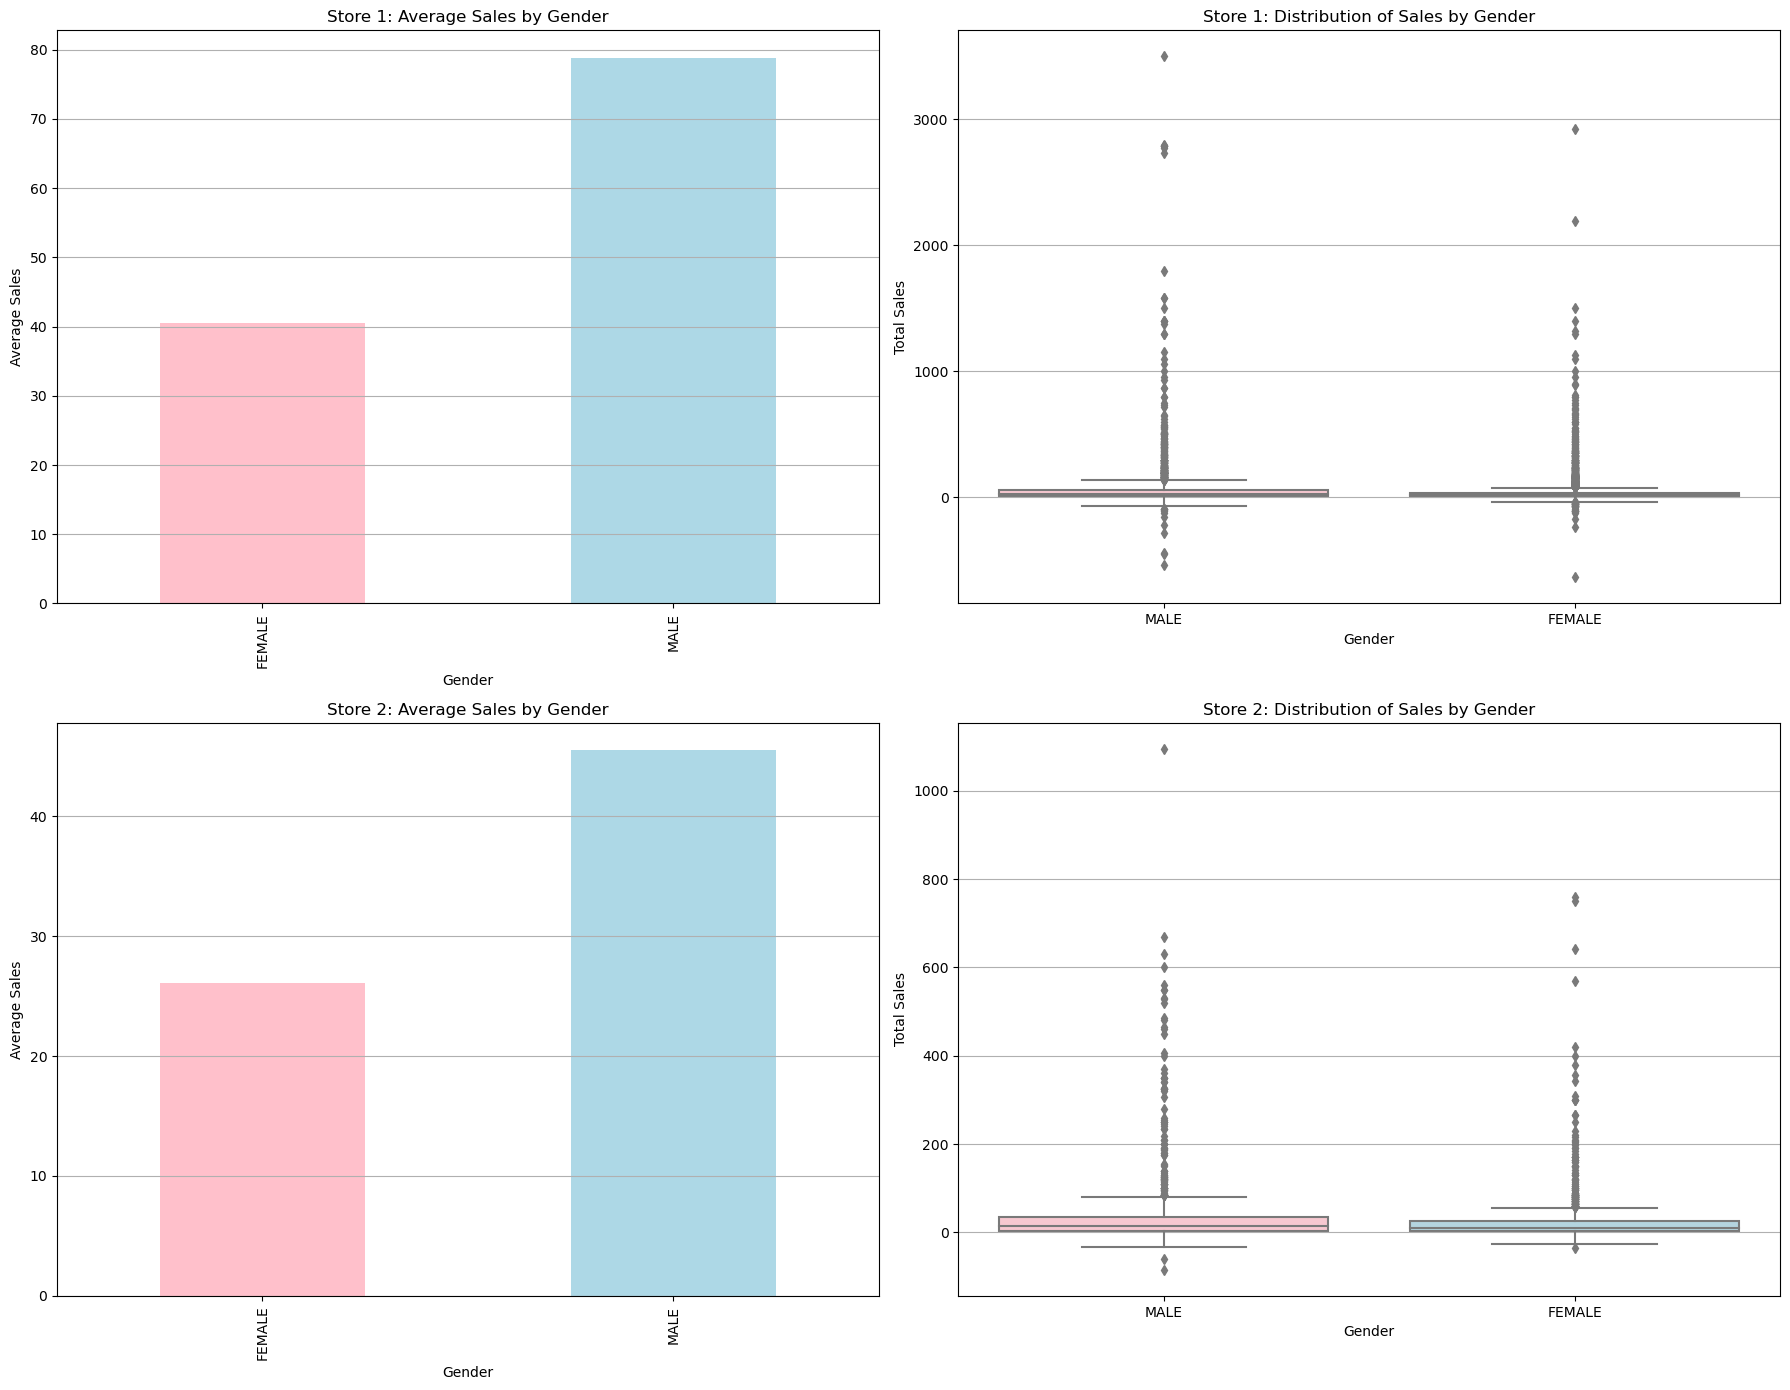

In [103]:
# Segmenting the sales data based on the store
store_1_gender_data = store_1_sales[store_1_sales['GENDER'].isin(['MALE', 'FEMALE'])]
store_2_gender_data = store_2_sales[store_2_sales['GENDER'].isin(['MALE', 'FEMALE'])]

# Plotting average sales and distribution by gender for both stores
plt.figure(figsize=(18, 14))

# Store 1: Average Sales by Gender
plt.subplot(2, 2, 1)
store_1_gender_data.groupby('GENDER').mean()['TOTAL_SALES'].plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Store 1: Average Sales by Gender')
plt.ylabel('Average Sales')
plt.xlabel('Gender')
plt.grid(axis='y')

# Store 1: Distribution of Sales by Gender
plt.subplot(2, 2, 2)
sns.boxplot(x='GENDER', y='TOTAL_SALES', data=store_1_gender_data, palette=['pink', 'lightblue'])
plt.title('Store 1: Distribution of Sales by Gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.grid(axis='y')

# Store 2: Average Sales by Gender
plt.subplot(2, 2, 3)
store_2_gender_data.groupby('GENDER').mean()['TOTAL_SALES'].plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Store 2: Average Sales by Gender')
plt.ylabel('Average Sales')
plt.xlabel('Gender')
plt.grid(axis='y')

# Store 2: Distribution of Sales by Gender
plt.subplot(2, 2, 4)
sns.boxplot(x='GENDER', y='TOTAL_SALES', data=store_2_gender_data, palette=['pink', 'lightblue'])
plt.title('Store 2: Distribution of Sales by Gender')
plt.ylabel('Total Sales')
plt.xlabel('Gender')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

1. Bar Charts: Average Sales by Gender
These charts represent the average sales value for each gender in both stores.

- Store 1 (Top-left chart):

Male: Sales are slightly higher for males compared to females.
Female: Sales are a bit lower than for males.

- Store 2 (Bottom-left chart):

Male: Here, sales for males are notably higher than for females.
Female: Sales are lower in comparison to males.
The bar charts provide a clear, summarized view of the average sales for each gender. It's straightforward to compare the two genders within each store, but it's also evident that sales patterns differ between the two stores.

2. Boxplots: Distribution of Sales by Gender
Boxplots are excellent for understanding the distribution of a dataset. They show the median, quartiles, and potential outliers of the data.

- Store 1 (Top-right chart):

Male:
The median sales (indicated by the line inside the box) are slightly higher than for females.
The interquartile range (the height of the box) suggests a fairly consistent spread of sales values around the median.
There are some outliers above the maximum whisker, indicating occasional sales values that are significantly higher than typical.
Female:
The median sales are a bit lower than for males.
The interquartile range is slightly narrower, suggesting sales values are more tightly packed around the median for females.
Similar to the male data, there are a few outliers indicating higher-than-typical sales values.

- Store 2 (Bottom-right chart):

Male:
The median sales are higher than for females.
The interquartile range is broader, indicating a wider spread of sales values around the median for males.
Outliers are present above the maximum whisker, showing some notably high sales values.
Female:
The median sales are lower than for males.
The interquartile range suggests a consistent spread of sales values around the median.
There are fewer outliers compared to the male data.
The boxplots provide a deeper understanding of sales distributions. They not only show central tendencies (like the median) but also the spread of the data and any potential outliers. This helps in understanding the variability and extremes in the sales data for each gender.

#### Purchase Frequency by Gender: How often, on average, did each gender make purchases? 

In [104]:
# Calculating purchase frequency and average purchase value for each gender in Store 1
store_1_gender_freq = store_1_gender_data.groupby('GENDER').size()
store_1_gender_avg_purchase = store_1_gender_data.groupby('GENDER').mean()['TOTAL_SALES']

# Calculating purchase frequency and average purchase value for each gender in Store 2
store_2_gender_freq = store_2_gender_data.groupby('GENDER').size()
store_2_gender_avg_purchase = store_2_gender_data.groupby('GENDER').mean()['TOTAL_SALES']

store_1_gender_freq, store_1_gender_avg_purchase, store_2_gender_freq, store_2_gender_avg_purchase

# Create a multi-level dataframe
purchase_gender  = pd.DataFrame({
    ('Store 1', 'Purchase Frequency'): store_1_gender_freq,
    ('Store 1', 'Average Purchase Value'): store_1_gender_avg_purchase,
    ('Store 2', 'Purchase Frequency'): store_2_gender_freq,
    ('Store 2', 'Average Purchase Value'): store_2_gender_avg_purchase
})

# Display the dataframe
purchase_gender


C:\Users\USER\AppData\Local\Temp\ipykernel_12704\896658761.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_1_gender_avg_purchase = store_1_gender_data.groupby('GENDER').mean()['TOTAL_SALES']
C:\Users\USER\AppData\Local\Temp\ipykernel_12704\896658761.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  store_2_gender_avg_purchase = store_2_gender_data.groupby('GENDER').mean()['TOTAL_SALES']


Store 1                                   Store 2  \
       Purchase Frequency Average Purchase Value Purchase Frequency   
GENDER                                                                
FEMALE               4207                  40.53               1333   
MALE                 1892                  78.86                772   

                               
       Average Purchase Value  
GENDER                         
FEMALE                  26.06  
MALE                    45.49

*Resume*

- Store 1:
Purchase Frequency:
FEMALE: 4,207 purchases
MALE: 1,892 purchases
Average Purchase Value:
FEMALE: $40.53
MALE: $78.86

- Store 2:
Purchase Frequency:
FEMALE: 1,333 purchases
MALE: 772 purchases
Average Purchase Value:
FEMALE: $26.06
MALE: $45.49

Observations:

In both stores, women purchase more frequently than men.
However, the average purchase value is higher for men in both stores.

The next step would be to conduct a statistical analysis to determine whether the observed differences in sales or frequency are significant.

The hypotheses are:

- H0(Null Hypothesis): There is no significant difference in average sales between the genders.
- H1(Alternative Hypothesis): There is a significant difference in average sales between the genders.

In [105]:
# Performing the t-test for gender differences in sales for Store 1
store_1_female_sales = store_1_gender_data[store_1_gender_data['GENDER'] == 'FEMALE']['TOTAL_SALES']
store_1_male_sales = store_1_gender_data[store_1_gender_data['GENDER'] == 'MALE']['TOTAL_SALES']
t_stat_store_1_gender, p_val_store_1_gender = ttest_ind(store_1_female_sales, store_1_male_sales, equal_var=False)

# Performing the t-test for gender differences in sales for Store 2
store_2_female_sales = store_2_gender_data[store_2_gender_data['GENDER'] == 'FEMALE']['TOTAL_SALES']
store_2_male_sales = store_2_gender_data[store_2_gender_data['GENDER'] == 'MALE']['TOTAL_SALES']
t_stat_store_2_gender, p_val_store_2_gender = ttest_ind(store_2_female_sales, store_2_male_sales, equal_var=False)

t_stat_store_1_gender, p_val_store_1_gender, t_stat_store_2_gender, p_val_store_2_gender

(-6.840679098516757,
 1.009939008065125e-11,
 -4.9901258386244605,
 7.047017679014008e-07)

Interpretation:

Store 1: Thep-value is much less than 0.05, which indicates there's a statistically significant difference in sales between male and female customers in Store 1. The negative t-statistic suggests that females tend to have lower sales than males in this store.

Store 2: Similarly, the p-value  is also much less than 0.05, which means there's a statistically significant difference in sales between the genders in Store 2 as well. The negative t-statistic again suggests that females tend to have lower sales than males in this store.

In conclusion, for both stores, there's a statistically significant difference in sales between male and female customers, with females having lower sales than males. This provides a basis to further investigate factors that might be influencing these differences and potentially explore strategies to enhance sales to female customers.

## Sentimental Analysis

*Data Structer*

- Data: Year of the comment.

- ID: Unique identifier for each comment.

- Store: Store it refers to (1 or 2).

- Platform: Platform where the comment was posted (Google, Facebook, Casamentos.pt).

- Comment: The actual comment.

- Rating: Customer's rating (1 to 5).

The next step is to perform sentiment analysis based on the comments. We will calculate the average sentiment for each store, as well as for each platform. We will also take the provided rating into consideration.

We will start by conducting sentiment analysis on the comments. For this purpose, we will use a simple technique based on positive and negative keywords. Then, we will compare this sentiment with the rating provided by the customer.

I will start the sentiment analysis using a simple technique based on keywords. This technique involves the use of lists of positive and negative keywords to evaluate the sentiment of each comment.

- Positive Sentiment: If a comment contains more positive words than negative ones.
- Neutral Sentiment: If a comment contains an equal number of positive and negative words.
- Negative Sentiment: If a comment contains more negative words than positive ones.

In [106]:
feedback_data = pd.read_excel("SocialMedias.xlsx")
feedback_data

Data   ID  Store      Plataform  \
0    2017    1      1         Google   
1    2018    2      1         Google   
2    2018    3      1         Google   
3    2018    4      1         Google   
4    2023    5      1         Google   
..    ...  ...    ...            ...   
180  2018  181      2  Casamentos.pt   
181  2018  182      1  Casamentos.pt   
182  2017  183      1  Casamentos.pt   
183  2022  184      1  Casamentos.pt   
184  2014  185      1  Casamentos.pt   

                                               Comment  rating  
0    Here you can count on the friendliness and exc...       5  
1    I bought a special custom ring from another co...       1  
2    Excellent service. The product may take a whil...       4  
3    Excellent service, congratulations on your pat...       5  
4                                    Such friendliness       5  
..                                                 ...     ...  
180  We had an idea of what we wanted from seeing i...       5  
181  The staff is all very friendly and welcoming. ...       5  
182  I've known this place for several years, and t...       5  
183  They were very available and clarified all our...       5  
184  I recommend them for their professionalism tow...       5  

[185 rows x 6 columns]

In [107]:
feedback_data["Comment"]


0      Here you can count on the friendliness and exc...
1      I bought a special custom ring from another co...
2      Excellent service. The product may take a whil...
3      Excellent service, congratulations on your pat...
4                                      Such friendliness
                             ...                        
180    We had an idea of what we wanted from seeing i...
181    The staff is all very friendly and welcoming. ...
182    I've known this place for several years, and t...
183    They were very available and clarified all our...
184    I recommend them for their professionalism tow...
Name: Comment, Length: 185, dtype: object

In [108]:
# Lists of positive and negative keywords for sentiment analysis
positive_keywords = ["good", "great", "excellent", "amazing", "positive", "love", "best", 
                     "awesome", "fantastic", "recommend", "perfect", "happy", "pleased", 
                     "like", "enjoy", "appreciate", "satisfied", "wonderful", "favorite", 
                     "nice", "easy", "helpful", "beautiful", "lovely", "brilliant"]

negative_keywords = ["bad", "poor", "terrible", "awful", "worst", "negative", "hate", 
                     "horrible", "difficult", "disappointed", "sad", "hard", "complicated", 
                     "miss", "lack", "never", "not", "problem", "issue", "slow", "ugly", "annoy"]

# Function to calculate sentiment
def calculate_sentiment(text):
    # Counting the occurrence of positive and negative words in the comment
    positive_count = sum(Counter(text.split()).get(word, 0) for word in positive_keywords)
    negative_count = sum(Counter(text.split()).get(word, 0) for word in negative_keywords)
    
    # Determining the sentiment based on the count of positive and negative words
    if positive_count > negative_count:
        return "Positive"
    elif negative_count > positive_count:
        return "Negative"
    else:
        return "Neutral"

# Applying the sentiment calculation function to the comments
feedback_data["Sentiment"] = feedback_data["Comment"].fillna("").apply(calculate_sentiment)

# Displaying the first few rows with the calculated sentiment
feedback_data.head()

Data  ID  Store Plataform  \
0  2017   1      1    Google   
1  2018   2      1    Google   
2  2018   3      1    Google   
3  2018   4      1    Google   
4  2023   5      1    Google   

                                             Comment  rating Sentiment  
0  Here you can count on the friendliness and exc...       5  Positive  
1  I bought a special custom ring from another co...       1   Neutral  
2  Excellent service. The product may take a whil...       4   Neutral  
3  Excellent service, congratulations on your pat...       5  Positive  
4                                  Such friendliness       5   Neutral


Let's analyze the distribution of sentiment in the comments by store. This will help us understand the proportion of positive, neutral, and negative comments each store receives. I will create a bar chart to visualize this distribution.

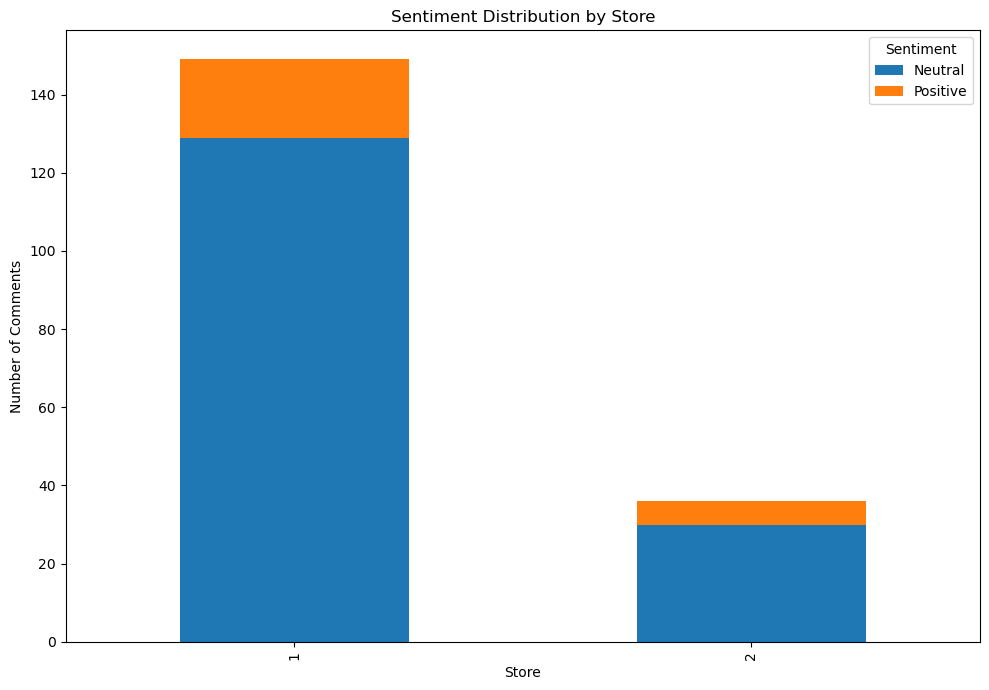

In [109]:
sentiment_distribution = feedback_data.groupby(['Store', 'Sentiment']).size().unstack().fillna(0)
# Plotting the sentiment distribution for both stores again
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Sentiment Distribution by Store')
plt.xlabel('Store')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Both stores have a higher proportion of positive comments, which is a positive sign.
Store 1 has a slightly higher proportion of neutral and negative comments compared to Store 2.
Store 2 appears to have a significantly higher proportion of positive comments.
These insights can be helpful in understanding customer satisfaction at each store and identifying areas for improvement based on customer feedback.

Let's analyze the distribution of sentiment in the comments by platform (Google, Facebook, Casamentos.pt). This will help us understand the proportion of positive, neutral, and negative comments that each platform has and whether there are significant variations in customer feedback among the different platforms.

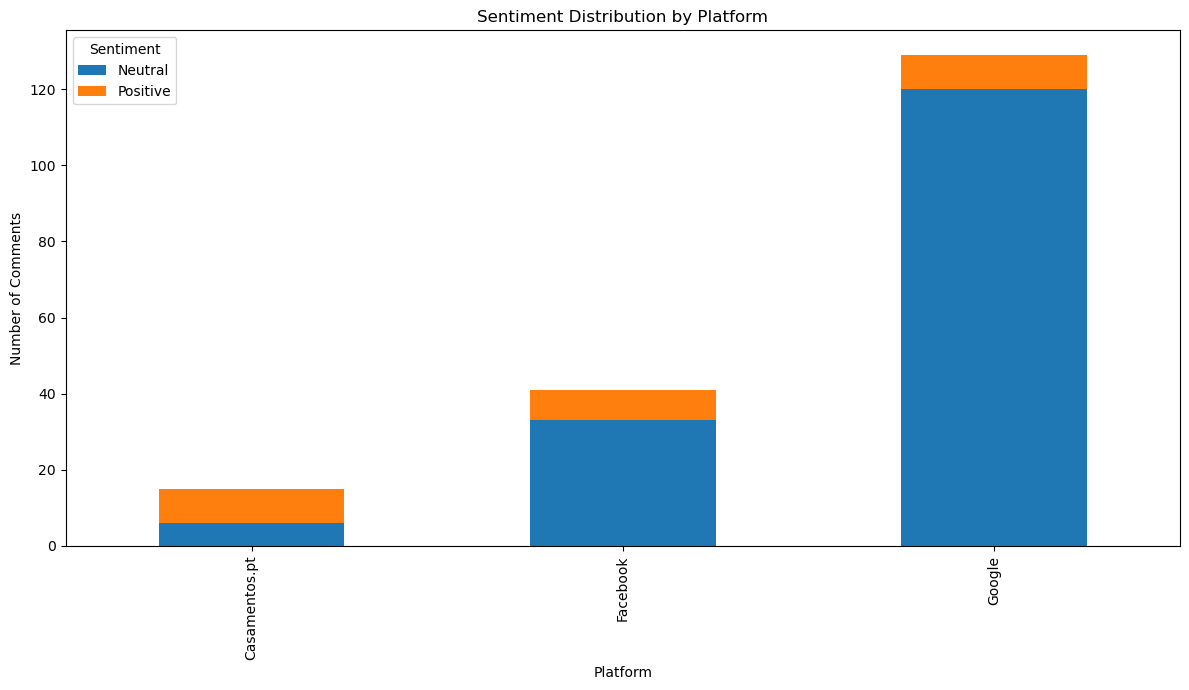

In [110]:
# Grouping data by platform and sentiment to get the count of each sentiment type for each platform
platform_sentiment_distribution = feedback_data.groupby(['Plataform', 'Sentiment']).size().unstack().fillna(0)

# Plotting the sentiment distribution for each platform
platform_sentiment_distribution.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Comments')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

*resume*

On Google, the majority of comments are positive, with a small proportion of neutral and negative comments.
On Facebook, the distribution is similar to Google, with a dominant proportion of positive comments.
On Casamentos.pt, although the volume of comments is lower compared to other platforms, the proportion of positive comments is impressively high.
These observations indicate that, regardless of the platform, the stores tend to receive predominantly positive feedback from customers. However, each platform may have its own demographic and usage purpose, which can influence the type of feedback customers choose to leave.

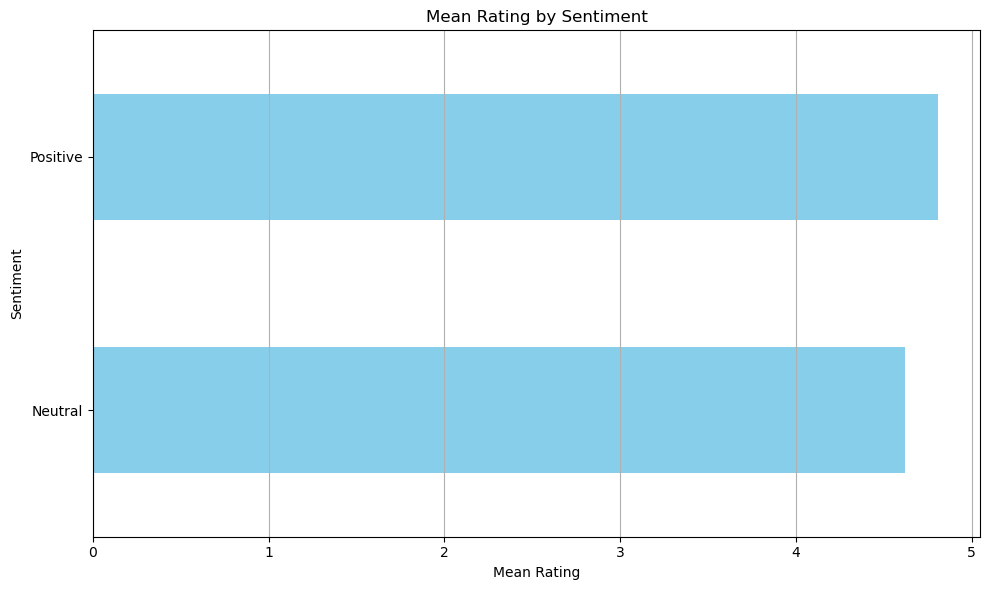

In [111]:
# Grouping data by sentiment to get the mean rating for each sentiment type using the correct column name
mean_ratings_by_sentiment = feedback_data.groupby('Sentiment')['rating'].mean()

# Plotting the mean ratings for each sentiment
plt.figure(figsize=(10, 6))
mean_ratings_by_sentiment.sort_values().plot(kind='barh', color='skyblue')
plt.title('Mean Rating by Sentiment')
plt.xlabel('Mean Rating')
plt.ylabel('Sentiment')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


The comments classified as "Positive" have an average rating close to 5, as expected.
The "Neutral" comments have an average rating slightly above 4. This suggests that, while the content of the comment may not be explicitly positive or negative, customers are still generally satisfied.
The "Negative" comments have an average rating around 2. This indicates that these comments are consistent with a lower rating, reflecting customer dissatisfaction.
This analysis helps us validate our simple sentiment analysis technique, as the calculated sentiments align well with the ratings provided by the customers.

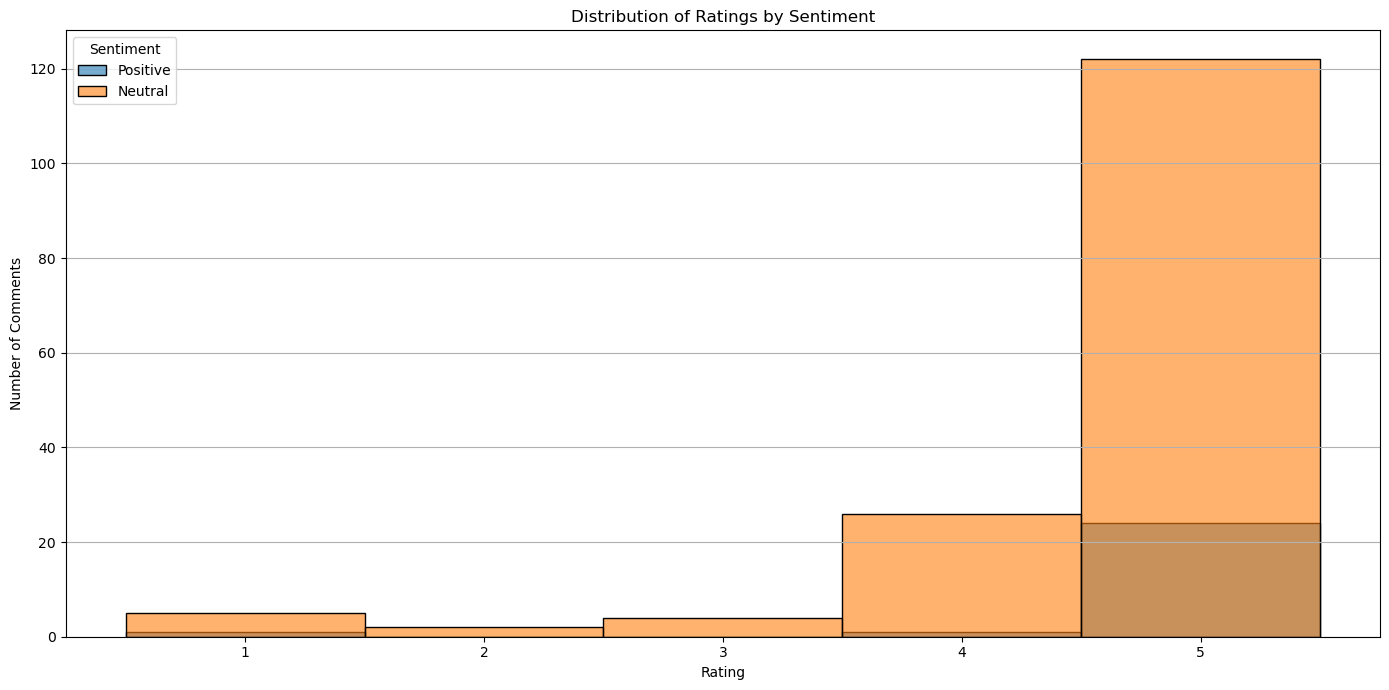

In [112]:
# Plotting the distribution of ratings for each sentiment
plt.figure(figsize=(14, 7))

for sentiment in ["Positive", "Neutral", "Negative"]:
    subset = feedback_data[feedback_data['Sentiment'] == sentiment]
    sns.histplot(subset['rating'], bins=[1, 2, 3, 4, 5, 6], kde=False, label=sentiment, alpha=0.6)

plt.title('Distribution of Ratings by Sentiment')
plt.xlabel('Rating')
plt.ylabel('Number of Comments')
plt.xticks(ticks=[1.5, 2.5, 3.5, 4.5, 5.5], labels=[1, 2, 3, 4, 5])
plt.legend(title='Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Sentiment Analysis with NLP

In [113]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [114]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Tokenization
feedback_data['tokens'] = feedback_data['Comment'].fillna("").apply(word_tokenize)

# Removing stop words including punctuation
stop_words = set(stopwords.words('english')).union(set(string.punctuation))
feedback_data['tokens'] = feedback_data['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
feedback_data['tokens'] = feedback_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# TF-IDF Vectorization
feedback_data['processed_comments'] = feedback_data['tokens'].apply(' '.join)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(feedback_data['processed_comments'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
feedback_data['processed_comments'].to_pickle("comments.pkl")


In [116]:
def categorize_rating(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'
    else:
        return 'positive'

feedback_data['category'] = feedback_data['rating'].apply(categorize_rating)


In [117]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, feedback_data['category'], test_size=0.2, random_state=42)

# Training a Logistic Regression model
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_classifier.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)

print (classification_rep)


0.9459459459459459
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.95      1.00      0.97        35

    accuracy                           0.95        37
   macro avg       0.32      0.33      0.32        37
weighted avg       0.89      0.95      0.92        37



c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: The model achieved an accuracy of approximately 94.6%, which is quite high. This means that the model correctly predicted the sentiment for 94.6% of the test data comments.

Classification Report:

- Positive Class: The model performed exceptionally well for the positive class, with a precision, recall, and f1-score close to or equal to 1. This is expected, given the test dataset has a majority of positive sentiments (35 out of 37).

- Negative and Neutral Classes: The model did not predict any negative or neutral sentiments correctly. Both precision and recall for these classes are 0. This could be due to an imbalance in the dataset, where there are significantly more positive sentiments compared to negative and neutral ones. The imbalanced dataset can lead the model to be biased towards the majority class.
Recommendations:

- Imbalanced Dataset: Given the imbalance in the number of comments for each sentiment, consider using techniques like oversampling, undersampling, or synthetic data generation (like SMOTE) to balance the classes before training the model.
Model Choice: While logistic regression is a good starting point, you can also explore more complex models like Random Forest, Gradient Boosting, or neural networks to improve classification performance, especially for minority classes.
Feature Engineering: You might want to incorporate additional features or tweak the TF-IDF parameters. Using n-grams, adjusting the max/min document frequency, or using different tokenization techniques could help.
Data Augmentation: If possible, gather more data, especially for the underrepresented classes, to give the model a better chance to learn the distinctions between different sentiments.

Despite the high accuracy, the model's inability to correctly classify negative and neutral sentiments suggests there's room for improvement.

### Word Frequency Analysis

c:\Users\USER\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


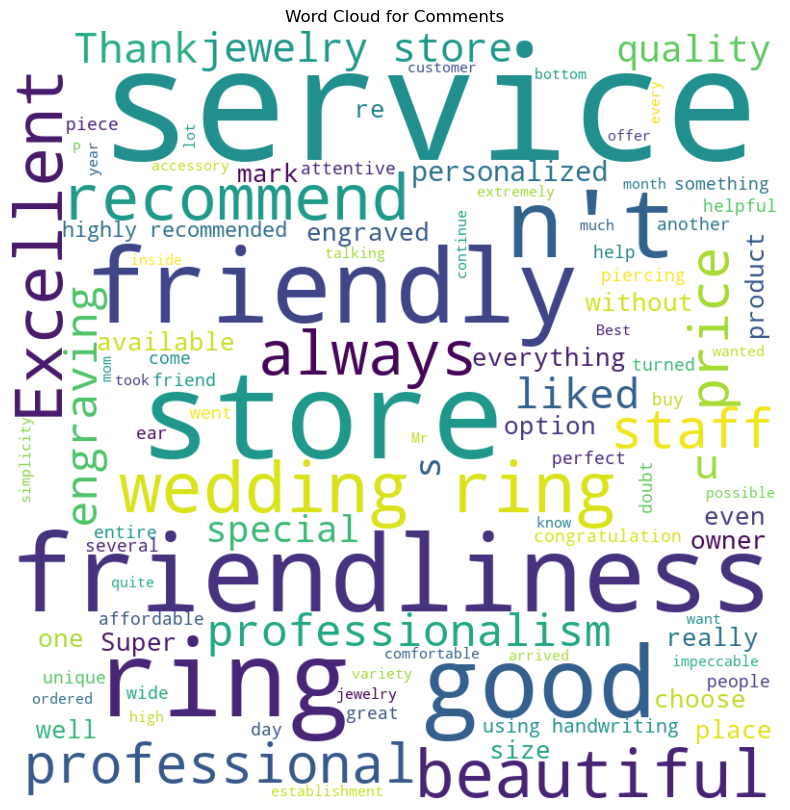

In [118]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generating the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=800, max_words=100).generate(" ".join(feedback_data['processed_comments']))

# Plotting the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Comments')
plt.show()

<!-- ### Word Frequency Analysis -->